# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import warnings
import warnings


In [4]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [7]:
# Try loading one file

df = pd.read_parquet('/content/drive/MyDrive/Master Class/upGrad & IIITB/Course 2: Data Toolkit/Exploratory Data Analysis/NYC/trip_records/2023-1.parquet')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [24]:
import os
import glob
import pandas as pd

# Set the directory containing the data files
data_folder = "/content/drive/MyDrive/Master Class/upGrad & IIITB/Course 2: Data Toolkit/Exploratory Data Analysis/NYC/trip_records"
# List all monthly files in the directory
file_list = sorted(os.listdir(data_folder))  # Sort to process in order

# Initialize an empty dataframe to store the final sampled data
df_final = pd.DataFrame()

# Iterate through the files and process them correctly
for file_name in file_list:
    try:
        # Full path for the current file
        file_path = os.path.join(data_folder, file_name)

        # Determine file type and read accordingly
        if file_name.endswith(".csv"):
            df_month = pd.read_csv(file_path, parse_dates=["tpep_pickup_datetime"])
        elif file_name.endswith(".parquet"):
            df_month = pd.read_parquet(file_path)  # Read Parquet file
            df_month["tpep_pickup_datetime"] = pd.to_datetime(df_month["tpep_pickup_datetime"])  # Ensure datetime format

        # Extract date and hour for processing
        df_month["date"] = df_month["tpep_pickup_datetime"].dt.date
        df_month["hour"] = df_month["tpep_pickup_datetime"].dt.hour

        # Initialize a dataframe to store sampled data for the current month
        df_sampled_month = pd.DataFrame()

        # Loop through each date in the dataset
        for date in df_month["date"].unique():
            df_day = df_month[df_month["date"] == date]

            # Loop through each hour of the selected date
            for hour in range(24):
                df_hour = df_day[df_day["hour"] == hour]

                # Sample 5% of the hourly data randomly (only if data exists for that hour)
                if not df_hour.empty:
                    df_sampled_hour = df_hour.sample(frac=0.05, random_state=42)  # Fixed random_state for reproducibility
                    df_sampled_month = pd.concat([df_sampled_month, df_sampled_hour])

        # Append the sampled data for the month to the final dataframe
        df_final = pd.concat([df_final, df_sampled_month])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Reset index after sampling
df_final.reset_index(drop=True, inplace=True)

# Save the final sampled dataset (optional)
df_final.to_csv("sampled_nyc_taxi_data.csv", index=False)

# Display summary
print("Final sampled data shape:", df_final.shape)
df_final.head()
# os.chdir(data_dir)

# # Get all parquet files in the directory
# file_list = glob.glob(os.path.join(data_dir, "*.parquet"))

# # Initialize an empty list to store sampled data
# all_sampled_data = []

# # Iterate through each file
# for file_path in file_list:
#     try:
#         print(f"Processing: {file_path}")

#         # Read the Parquet file
#         monthly_data = pd.read_parquet(file_path)

#         # Ensure datetime column is in datetime format
#         monthly_data["tpep_pickup_datetime"] = pd.to_datetime(monthly_data["tpep_pickup_datetime"])

#         # Sample data: Take 5% of each hour per day
#         sampled_data = (
#             monthly_data.groupby([monthly_data["tpep_pickup_datetime"].dt.date,
#                                   monthly_data["tpep_pickup_datetime"].dt.hour])
#                         .apply(lambda x: x.sample(frac=0.05, random_state=42))
#                         .reset_index(drop=True)
#         )

#         # Store the sampled data
#         all_sampled_data.append(sampled_data)

#     except Exception as e:
#         print(f"Error processing file {file_path}: {e}")
# print(len(all_sampled_data))
# # Combine all sampled data into a single DataFrame
# df = pd.concat(all_sampled_data, ignore_index=True)

# # Print final dataframe info
# print(df.info())


Final sampled data shape: (1896400, 22)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,...,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [33]:
# Store the df in csv/parquet
df_final.to_parquet('/content/drive/MyDrive/Master Class/upGrad & IIITB/Course 2: Data Toolkit/Exploratory Data Analysis/NYC/NYC_data.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [34]:
# Load the new data file
df = pd.read_parquet('/content/drive/MyDrive/Master Class/upGrad & IIITB/Course 2: Data Toolkit/Exploratory Data Analysis/NYC/NYC_data.parquet')

In [35]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,...,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [37]:
# Fix the index and drop any columns that are not needed
# Fix the index
df = df.reset_index(drop=True)

# Drop unnecessary columns
# columns_to_drop = ['VendorID', 'store_and_fwd_flag']
# df = df.drop(columns=columns_to_drop)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [38]:
# Combine the two airport fee columns
# Combine the two airport fee columns
df['airport_fee'] = df['airport_fee'].fillna(0) + df['Airport_fee'].fillna(0)
df = df.drop(columns=['Airport_fee'])  # Drop the redundant column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour
count,1.896400e+06,1896400,1896400,1.831526e+06,1.896400e+06,1.831526e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.831526e+06,1.896400e+06,1.896400e+06
mean,1.733026e+00,2023-07-02 19:59:52.930795,2023-07-02 20:17:18.919563,1.369215e+00,3.858293e+00,1.634694e+00,1.652814e+02,1.640515e+02,1.163817e+00,1.991935e+01,1.588018e+00,4.952796e-01,3.547011e+00,5.965338e-01,9.989706e-01,2.898186e+01,2.307524e+00,1.380093e-01,1.426504e+01
min,1.000000e+00,2022-12-31 23:51:30,2022-12-31 23:56:06,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-2.500000e+00,-5.000000e-01,0.000000e+00,0.000000e+00,-1.000000e+00,-5.750000e+00,-2.500000e+00,-1.750000e+00,0.000000e+00
25%,1.000000e+00,2023-04-02 16:10:08.750000,2023-04-02 16:27:43.500000,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00,1.100000e+01
50%,2.000000e+00,2023-06-27 15:44:22.500000,2023-06-27 16:01:15,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.850000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00,1.500000e+01
75%,2.000000e+00,2023-10-06 19:37:45,2023-10-06 19:53:39,1.000000e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.420000e+00,0.000000e+00,1.000000e+00,3.094000e+01,2.500000e+00,0.000000e+00,1.900000e+01
max,6.000000e+00,2023-12-31 23:57:51,2024-01-01 20:50:55,9.000000e+00,1.263605e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.431635e+05,2.080000e+01,4.000000e+00,2.230800e+02,1.430000e+02,1.000000e+00,1.431675e+05,2.500000e+00,1.750000e+00,2.300000e+01
std,4.476401e-01,NaN,NaN,8.927560e-01,1.294085e+02,7.393915e+00,6.400038e+01,6.980207e+01,5.081384e-01,1.055371e+02,1.829200e+00,4.885128e-02,4.054882e+00,2.187878e+00,3.112072e-02,1.064162e+02,6.667267e-01,4.575896e-01,5.807381e+00


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [39]:
# check where values of fare amount are negative
negative_fare_rows = df[df['fare_amount'] < 0]
negative_fare_rows

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour


Did you notice something different in the `RatecodeID` column for above records?

In [40]:
# Analyse RatecodeID for the negative fare amounts
negative_fare_ratecodes = df[df['fare_amount'] < 0]['RatecodeID'].value_counts()
print(negative_fare_ratecodes)


Series([], Name: count, dtype: int64)


In [41]:
# Find which columns have negative values
numeric_columns = df.select_dtypes(include='number').columns
columns_with_negative_values = numeric_columns[(df[numeric_columns] < 0).any()]
print(columns_with_negative_values)


Index(['extra', 'mta_tax', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee'],
      dtype='object')


In [42]:
# fix these negative values
# Replace negative values with 0 in specified columns
columns_to_fix = columns_with_negative_values  # Add other relevant columns if needed

for column in columns_to_fix:
    df.loc[df[column] < 0, column] = 0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [43]:
# Find the proportion of missing values in each column
# Find the proportion of missing values in each column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)


                                 column_name  percent_missing
VendorID                            VendorID         0.000000
tpep_pickup_datetime    tpep_pickup_datetime         0.000000
tpep_dropoff_datetime  tpep_dropoff_datetime         0.000000
passenger_count              passenger_count         3.420903
trip_distance                  trip_distance         0.000000
RatecodeID                        RatecodeID         3.420903
store_and_fwd_flag        store_and_fwd_flag         3.420903
PULocationID                    PULocationID         0.000000
DOLocationID                    DOLocationID         0.000000
payment_type                    payment_type         0.000000
fare_amount                      fare_amount         0.000000
extra                                  extra         0.000000
mta_tax                              mta_tax         0.000000
tip_amount                        tip_amount         0.000000
tolls_amount                    tolls_amount         0.000000
improvem

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [44]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
# Display the rows with null values in passenger_count column
null_passenger_count_rows = df[df['passenger_count'].isnull()]
null_passenger_count_rows.info()

# Impute NaN values in passenger_count column with the median
median_passenger_count = df['passenger_count'].median()
df['passenger_count'].fillna(median_passenger_count, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 64874 entries, 4 to 1896387
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               64874 non-null  int64         
 1   tpep_pickup_datetime   64874 non-null  datetime64[us]
 2   tpep_dropoff_datetime  64874 non-null  datetime64[us]
 3   passenger_count        0 non-null      float64       
 4   trip_distance          64874 non-null  float64       
 5   RatecodeID             0 non-null      float64       
 6   store_and_fwd_flag     0 non-null      object        
 7   PULocationID           64874 non-null  int64         
 8   DOLocationID           64874 non-null  int64         
 9   payment_type           64874 non-null  int64         
 10  fare_amount            64874 non-null  float64       
 11  extra                  64874 non-null  float64       
 12  mta_tax                64874 non-null  float64       
 13  tip_

<ipython-input-44-7ad060782610>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(median_passenger_count, inplace=True)


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [45]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)

<ipython-input-45-47fa15ebc76c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [46]:
# handle null values in congestion_surcharge
# handle null values in congestion_surcharge
df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(), inplace=True)



<ipython-input-46-bbda208897ad>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(), inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [47]:
# Handle any remaining missing values dynamically
for column in df.columns:
    if df[column].isnull().any():  # Check if column has missing values
        if df[column].dtype == "object":  # If column is categorical
            df[column].fillna(df[column].mode()[0], inplace=True)  # Fill with mode (most frequent value)
        else:  # If column is numerical
            df[column].fillna(df[column].median(), inplace=True)  # Fill with median (robust to outliers)

# Verify that no missing values remain
print("Total missing values after handling:", df.isnull().sum().sum())  # Should print 0 if all NaNs are handled


<ipython-input-47-ae5acd8ca78f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)  # Fill with mode (most frequent value)


Total missing values after handling: 0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [48]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour
count,1.896400e+06,1896400,1896400,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06
mean,1.733026e+00,2023-07-02 19:59:52.930795,2023-07-02 20:17:18.919563,1.356585e+00,3.858293e+00,1.612981e+00,1.652814e+02,1.640515e+02,1.163817e+00,1.991935e+01,1.588020e+00,4.952989e-01,3.547011e+00,5.965338e-01,9.990118e-01,2.898201e+01,2.314182e+00,1.380220e-01,1.426504e+01
min,1.000000e+00,2022-12-31 23:51:30,2022-12-31 23:56:06,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2023-04-02 16:10:08.750000,2023-04-02 16:27:43.500000,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00,1.100000e+01
50%,2.000000e+00,2023-06-27 15:44:22.500000,2023-06-27 16:01:15,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.850000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00,1.500000e+01
75%,2.000000e+00,2023-10-06 19:37:45,2023-10-06 19:53:39,1.000000e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.420000e+00,0.000000e+00,1.000000e+00,3.094000e+01,2.500000e+00,0.000000e+00,1.900000e+01
max,6.000000e+00,2023-12-31 23:57:51,2024-01-01 20:50:55,9.000000e+00,1.263605e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.431635e+05,2.080000e+01,4.000000e+00,2.230800e+02,1.430000e+02,1.000000e+00,1.431675e+05,2.500000e+00,1.750000e+00,2.300000e+01
std,4.476401e-01,NaN,NaN,8.799160e-01,1.294085e+02,7.267261e+00,6.400038e+01,6.980207e+01,5.081384e-01,1.055371e+02,1.829197e+00,4.855675e-02,4.054882e+00,2.187878e+00,2.907216e-02,1.064162e+02,6.557557e-01,4.575627e-01,5.807381e+00


In [51]:
# Describe the data and check if there are any potential outliers present
# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# List of numerical columns to check
num_cols = ["trip_distance", "fare_amount", "tip_amount", "total_amount", "passenger_count"]

# Detect and count outliers for each column
for col in num_cols:
    outliers = detect_outliers(df, col)
    print(f"Column: {col} → Outliers detected: {len(outliers)}")



Column: trip_distance → Outliers detected: 249302
Column: fare_amount → Outliers detected: 197413
Column: tip_amount → Outliers detected: 145673
Column: total_amount → Outliers detected: 218083
Column: passenger_count → Outliers detected: 454302


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [52]:
# remove passenger_count > 6
df_test = df[df['passenger_count'] <= 6]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896379 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [53]:
# Continue with outlier handling

# Entries where trip_distance is nearly 0 and fare_amount is more than 300
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

# Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

# Entries where trip_distance is more than 250 miles
df = df[df['trip_distance'] <= 250]

# Entries where payment_type is 0
df = df[df['payment_type'] != 0]

In [60]:
# Re-run IQR analysis to verify remaining outliers
for col in ["trip_distance", "fare_amount", "tip_amount", "total_amount"]:
    print(f"Remaining outliers in {col}:", df[(df[col] < df[col].quantile(0.01)) | (df[col] > df[col].quantile(0.99))].shape[0])


Remaining outliers in trip_distance: 18306
Remaining outliers in fare_amount: 34564
Remaining outliers in tip_amount: 18275
Remaining outliers in total_amount: 35630


In [55]:
# Do any columns need standardising?
import pandas as pd

# Convert time columns to datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])

# Ensure categorical columns are properly formatted
df["store_and_fwd_flag"] = df["store_and_fwd_flag"].astype(str).str.upper().replace({"nan": "N"})  # Convert to 'Y' or 'N'
df["payment_type"] = df["payment_type"].astype(int)  # Ensure integer format

# Standardize numeric columns (optional: scale them using Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = ["trip_distance", "fare_amount", "tip_amount", "total_amount"]

df[num_cols] = scaler.fit_transform(df[num_cols])  # Normalize between 0 and 1

print(df.dtypes)  # Check if columns have correct types
print(df.describe())  # Check if numeric columns are scaled properly


VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
date                             object
hour                              int32
dtype: object
           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.831412e+06                     1831412                    

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [56]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [ ]:
categorical_vars = [
    "VendorID",       # Categorical (Taxi company ID)
    "RatecodeID",     # Categorical (Rate type classification)
    "PULocationID",   # Categorical (Pickup location ID)
    "DOLocationID",   # Categorical (Dropoff location ID)
    "payment_type",   # Categorical (Type of payment method)
    "pickup_hour"     # Categorical (Hour of pickup - used for grouping)
]
numerical_vars = [
    "passenger_count",   # Numerical (Number of passengers)
    "trip_distance",     # Numerical (Distance of trip)
    "trip_duration"      # Numerical (Trip duration in seconds or minutes)
]
monetary_vars = [
    "fare_amount", "extra", "mta_tax", "tip_amount",
    "tolls_amount", "improvement_surcharge", "total_amount",
    "congestion_surcharge", "airport_fee"
]  # These are numerical because they represent amounts.
temporal_vars = [
    "tpep_pickup_datetime",   # Datetime (Exact pickup time)
    "tpep_dropoff_datetime"   # Datetime (Exact dropoff time)
]


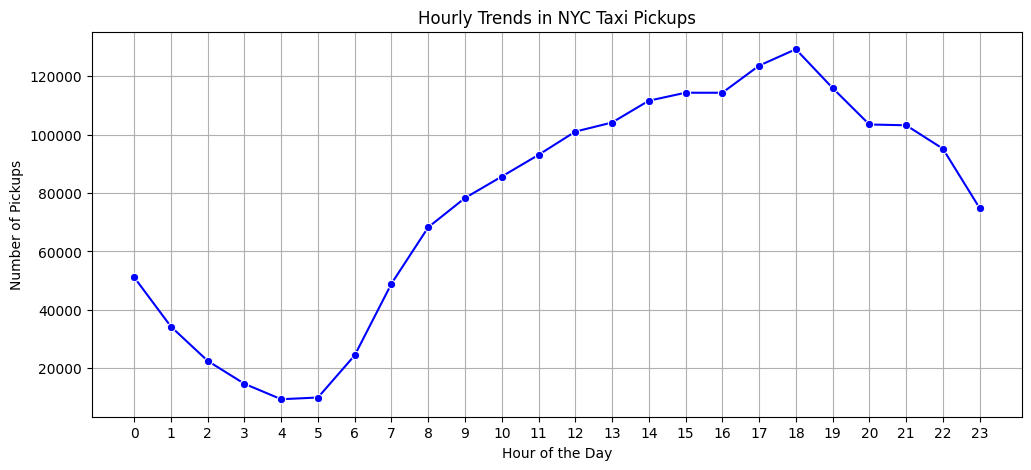

In [57]:
# Ensure datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Extract hours, days, and months for analysis
df["hour"] = df["tpep_pickup_datetime"].dt.hour
df["day_of_week"] = df["tpep_pickup_datetime"].dt.day_name()
df["month"] = df["tpep_pickup_datetime"].dt.month_name()

# Analyze hourly distribution of pickups
hourly_trends = df["hour"].value_counts().sort_index()

# Plot hourly taxi pickups
plt.figure(figsize=(12, 5))
sns.lineplot(x=hourly_trends.index, y=hourly_trends.values, marker="o", color="blue")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Trends in NYC Taxi Pickups")
plt.xticks(range(24))
plt.grid()
plt.show()

day_of_week
Monday       228963
Tuesday      265939
Wednesday    281566
Thursday     287267
Friday       271623
Saturday     265858
Sunday       230196
Name: count, dtype: int64


<ipython-input-58-6d19e45cbc2f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_trends.index, y=daily_trends.values, palette="Blues_r")


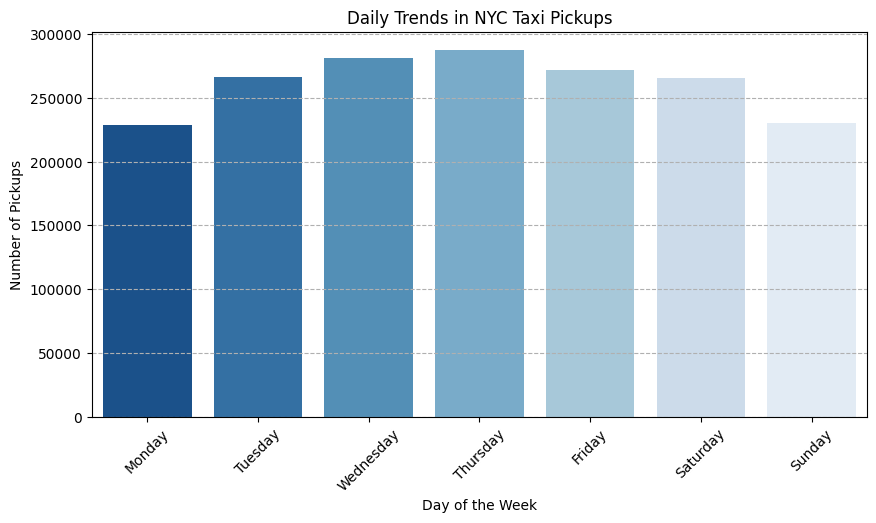

In [58]:
# Find and show the daily trends in taxi pickups (days of the week)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Extract the day of the week
df["day_of_week"] = df["tpep_pickup_datetime"].dt.day_name()

# Count pickups per day
daily_trends = df["day_of_week"].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Display trends
print(daily_trends)

# Plot daily pickup trends
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_trends.index, y=daily_trends.values, palette="Blues_r")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.title("Daily Trends in NYC Taxi Pickups")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.show()


month
January      148474
February     140713
March        164282
April        158379
May          168978
June         158987
July         139727
August       135255
September    133932
October      166524
November     158402
December     157759
Name: count, dtype: int64


<ipython-input-59-e558c331c93a>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_trends.index, y=monthly_trends.values, palette="coolwarm")


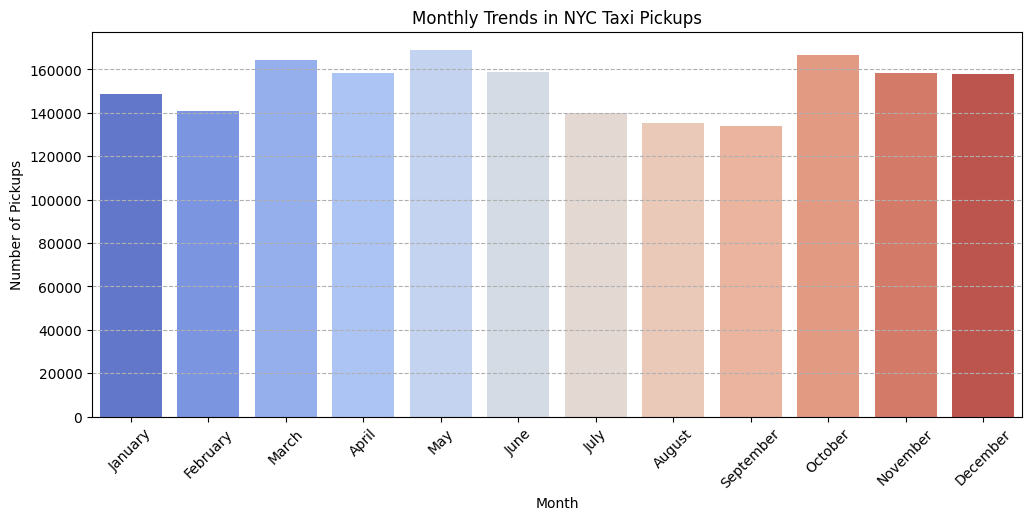

In [59]:
# Show the monthly trends in pickups
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Extract the month name
df["month"] = df["tpep_pickup_datetime"].dt.month_name()

# Count pickups per month
monthly_trends = df["month"].value_counts().reindex([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
])

# Display trends
print(monthly_trends)

# Plot monthly pickup trends
plt.figure(figsize=(12, 5))
sns.barplot(x=monthly_trends.index, y=monthly_trends.values, palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Monthly Trends in NYC Taxi Pickups")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [61]:
# Analyse the above parameters
# List of financial parameters and trip distance
cols_to_check = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Count zero and negative values
for col in cols_to_check:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"Column: {col}")
    print(f"  → Zero values: {zero_count}")
    print(f"  → Negative values: {negative_count}\n")
# Display rows where these columns have negative values
df_negative_values = df[(df["fare_amount"] < 0) | (df["tip_amount"] < 0) | (df["total_amount"] < 0) | (df["trip_distance"] < 0)]
print(df_negative_values.head())



Column: fare_amount
  → Zero values: 575
  → Negative values: 0

Column: tip_amount
  → Zero values: 410241
  → Negative values: 0

Column: total_amount
  → Zero values: 329
  → Negative values: 0

Column: trip_distance
  → Zero values: 22938
  → Negative values: 0

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour, day_of_week, month]
Index: []

[0 rows x 23 columns]


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [62]:
# Create a new DataFrame without zero values in selected parameters
df_non_zero = df[
    (df["fare_amount"] > 0) &
    (df["tip_amount"] > 0) &
    (df["total_amount"] > 0)
].copy()

print(f"Original DataFrame shape: {df.shape}")
print(f"Filtered DataFrame (non-zero values) shape: {df_non_zero.shape}")


Original DataFrame shape: (1831412, 23)
Filtered DataFrame (non-zero values) shape: (1421153, 23)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

month
January      28.325073
February     26.784443
March        32.302881
April        31.718485
May          34.538938
June         32.511448
July         28.301623
August       27.580997
September    29.139921
October      34.627681
November     32.231872
December     32.153109
Name: total_amount, dtype: float64


<ipython-input-63-f65cd25fbbe1>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="coolwarm")


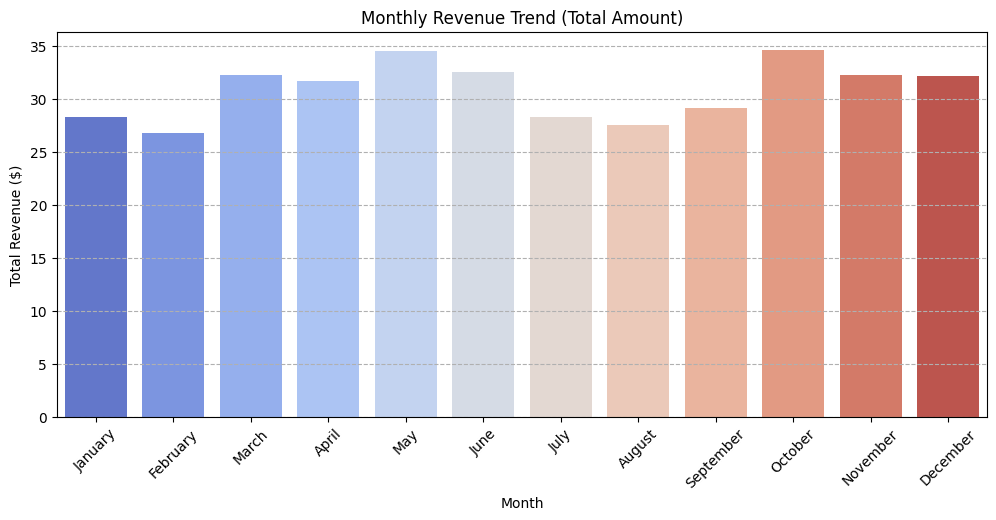

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Extract month
df["month"] = df["tpep_pickup_datetime"].dt.month_name()

# Group by month and sum total revenue
monthly_revenue = df.groupby("month")["total_amount"].sum().reindex([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
])

# Display revenue trends
print(monthly_revenue)

# Plot monthly revenue trends
plt.figure(figsize=(12, 5))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.title("Monthly Revenue Trend (Total Amount)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

quarter
2022Q4     0.000025
2023Q1    23.611158
2023Q2    26.678681
2023Q3    22.965629
2023Q4    26.744506
Freq: Q-DEC, Name: total_amount, dtype: float64


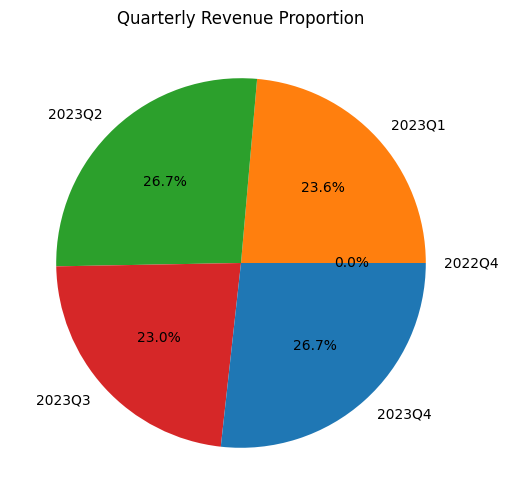

In [64]:
# Calculate proportion of each quarter
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Extract quarter
df["quarter"] = df["tpep_pickup_datetime"].dt.to_period("Q")  # Format: '2023Q1', '2023Q2', etc.

# Group by quarter and sum total revenue
quarterly_revenue = df.groupby("quarter")["total_amount"].sum()

# Calculate proportion of each quarter
quarterly_proportion = (quarterly_revenue / quarterly_revenue.sum()) * 100

# Display quarterly revenue proportion
print(quarterly_proportion)

# Plot quarterly revenue share as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(quarterly_proportion, labels=quarterly_proportion.index, autopct="%1.1f%%", colors=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"])
plt.title("Quarterly Revenue Proportion")
plt.show()



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Original DataFrame: (1831412, 24)
Filtered DataFrame (trip_distance > 0): (1808474, 24)


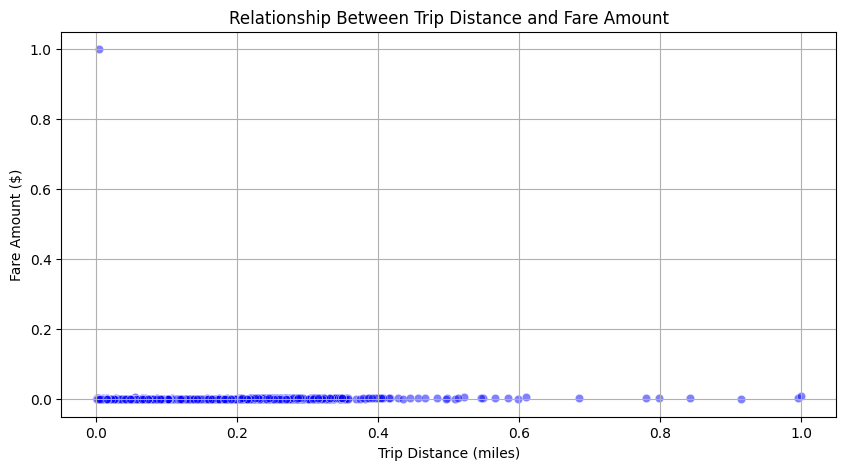

Correlation between Trip Distance and Fare Amount: 0.16


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remove trips with zero distance
df_filtered = df[df["trip_distance"] > 0].copy()

# Display the shape of filtered data
print(f"Original DataFrame: {df.shape}")
print(f"Filtered DataFrame (trip_distance > 0): {df_filtered.shape}")

# Scatter plot of trip distance vs fare amount
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_filtered["trip_distance"], y=df_filtered["fare_amount"], alpha=0.5, color="blue")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Relationship Between Trip Distance and Fare Amount")
plt.grid(True)
plt.show()

# Compute correlation
correlation = df_filtered["trip_distance"].corr(df_filtered["fare_amount"])
print(f"Correlation between Trip Distance and Fare Amount: {correlation:.2f}")



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

   trip_duration  fare_amount
0      15.950000     0.000226
1       5.083333     0.000055
2      10.550000     0.000080
3       5.416667     0.000045
5      33.616667     0.000241


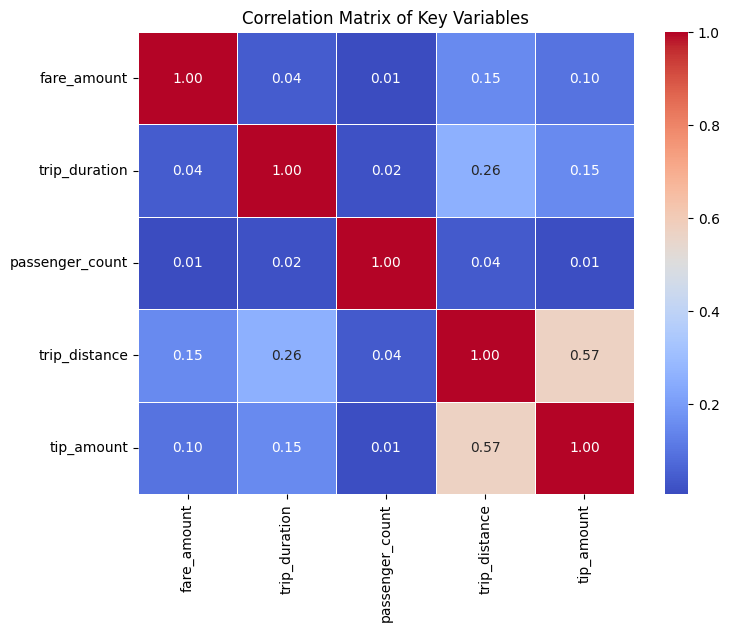

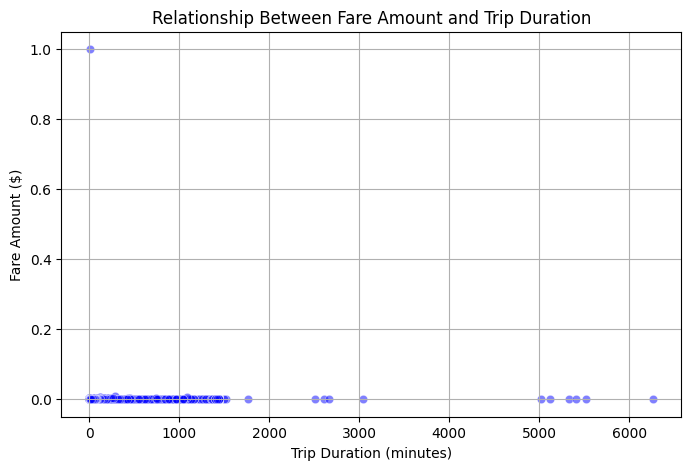

In [66]:
# Show relationship between fare and trip duration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])

# Calculate trip duration in minutes
df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60

# Remove trips with zero or negative duration (data errors)
df = df[df["trip_duration"] > 0]

print(df[["trip_duration", "fare_amount"]].head())

# Compute correlations
correlations = df[["fare_amount", "trip_duration", "passenger_count", "trip_distance", "tip_amount"]].corr()

# Show correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Variables")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["trip_duration"], y=df["fare_amount"], alpha=0.5, color="blue")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.title("Relationship Between Fare Amount and Trip Duration")
plt.grid(True)
plt.show()


<ipython-input-67-3c3f7049ce9a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["passenger_count"], y=df["fare_amount"], palette="coolwarm")


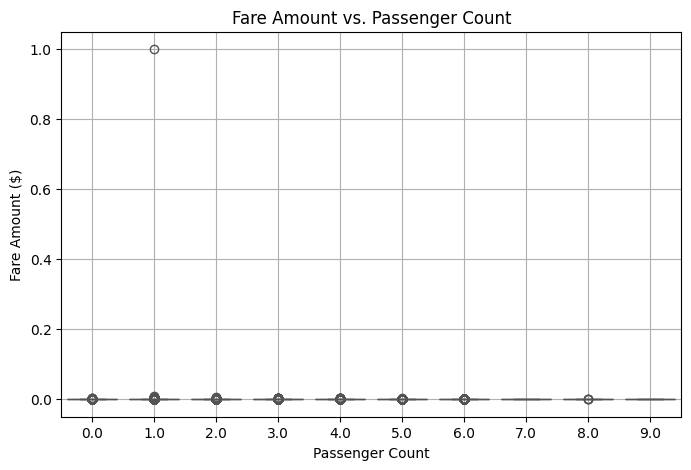

In [67]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["passenger_count"], y=df["fare_amount"], palette="coolwarm")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount vs. Passenger Count")
plt.grid(True)
plt.show()


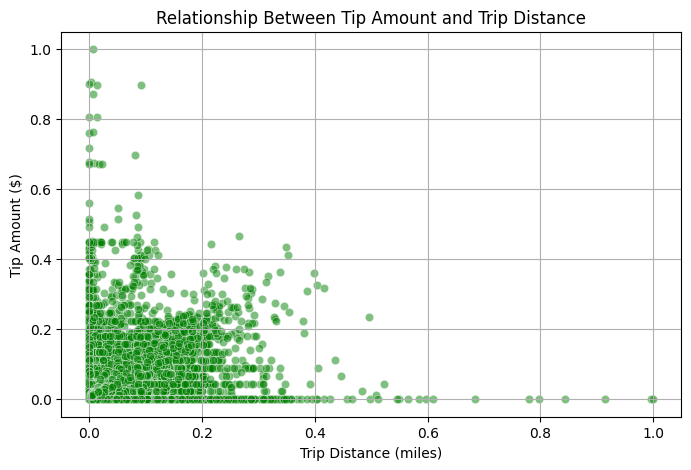

In [68]:
# Show relationship between tip and trip distance
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["trip_distance"], y=df["tip_amount"], alpha=0.5, color="green")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.title("Relationship Between Tip Amount and Trip Distance")
plt.grid(True)
plt.show()



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

Payment Type Distribution:
 payment_type
1    1492194
2     315869
4      13670
3       8995
Name: count, dtype: int64


<ipython-input-69-63b887079a2c>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index.map(payment_labels), y=payment_counts.values, palette="coolwarm")


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

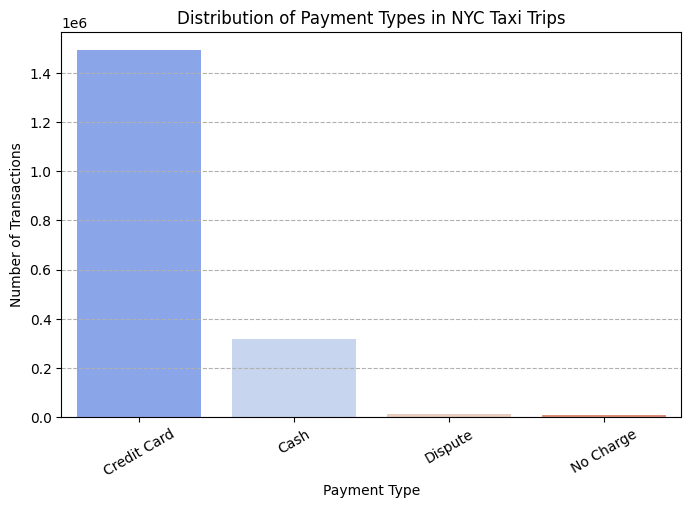

In [69]:
# Analyse the distribution of different payment types (payment_type).
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each payment type
payment_counts = df["payment_type"].value_counts()

# Display payment type distribution
print("Payment Type Distribution:\n", payment_counts)

# Define payment type labels (based on NYC Taxi dataset dictionary)
payment_labels = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute"
}

# Replace payment_type codes with labels
df["payment_type_label"] = df["payment_type"].map(payment_labels)

# Plot payment type distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index.map(payment_labels), y=payment_counts.values, palette="coolwarm")
plt.xlabel("Payment Type")
plt.ylabel("Number of Transactions")
plt.title("Distribution of Payment Types in NYC Taxi Trips")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--")
plt



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [70]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [71]:
import geopandas as gpd

# Define the path to the shapefile
shapefile_path = "/content/drive/MyDrive/Master Class/upGrad & IIITB/Course 2: Data Toolkit/Exploratory Data Analysis/NYC/taxi_zones/taxi_zones.shp"  # Update with the actual path

# Read the shapefile using GeoPandas
zones = gpd.read_file(shapefile_path)

# Display the first few rows
zones.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

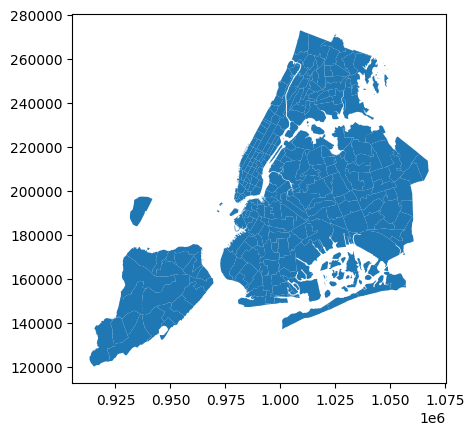

In [72]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [73]:
# Merge zones and trip records using locationID and PULocationID
# Merge zones with trip data using PULocationID
df = df.merge(zones[["LocationID", "zone", "borough"]],
              left_on="PULocationID", right_on="LocationID",
              how="left")

# Rename merged columns for clarity
df.rename(columns={"zone": "pickup_zone", "borough": "pickup_borough"}, inplace=True)

# Drop redundant LocationID column from merge
df.drop(columns=["LocationID"], inplace=True)

# Display merged data sample
print(df[["PULocationID", "pickup_zone", "pickup_borough"]].head())

# Merge zones with trip data using DOLocationID
df = df.merge(zones[["LocationID", "zone", "borough"]],
              left_on="DOLocationID", right_on="LocationID",
              how="left")

# Rename merged columns for clarity
df.rename(columns={"zone": "dropoff_zone", "borough": "dropoff_borough"}, inplace=True)

# Drop redundant LocationID column from merge
df.drop(columns=["LocationID"], inplace=True)

# Display merged data sample
print(df[["DOLocationID", "dropoff_zone", "dropoff_borough"]].head())


   PULocationID                pickup_zone pickup_borough
0           138          LaGuardia Airport         Queens
1           161             Midtown Center      Manhattan
2           237      Upper East Side South      Manhattan
3           143        Lincoln Square West      Manhattan
4           246  West Chelsea/Hudson Yards      Manhattan
   DOLocationID               dropoff_zone dropoff_borough
0           256  Williamsburg (South Side)        Brooklyn
1           237      Upper East Side South       Manhattan
2           141            Lenox Hill West       Manhattan
3           142        Lincoln Square East       Manhattan
4            37             Bushwick South        Brooklyn


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [74]:
# Group data by location and calculate the number of trips
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by pickup location ID and count trips
pickup_counts = df.groupby("PULocationID").size().reset_index(name="total_trips")

# Merge with zone data to add location names
pickup_counts = pickup_counts.merge(zones[["LocationID", "zone", "borough"]],
                                    left_on="PULocationID", right_on="LocationID",
                                    how="left").drop(columns=["LocationID"])

# Sort by total trips (highest to lowest)
pickup_counts = pickup_counts.sort_values(by="total_trips", ascending=False)

# Display top 10 busiest pickup locations
print(pickup_counts.head(10))



     PULocationID  total_trips                          zone    borough
126           132        96963                   JFK Airport     Queens
230           237        86888         Upper East Side South  Manhattan
155           161        85932                Midtown Center  Manhattan
229           236        77505         Upper East Side North  Manhattan
156           162        65624                  Midtown East  Manhattan
132           138        64266             LaGuardia Airport     Queens
179           186        63452  Penn Station/Madison Sq West  Manhattan
223           230        61300     Times Sq/Theatre District  Manhattan
136           142        60870           Lincoln Square East  Manhattan
164           170        54482                   Murray Hill  Manhattan


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

<ipython-input-75-a685ca271c8b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zones["total_trips"].fillna(0, inplace=True)


                      zone        borough  total_trips
0           Newark Airport            EWR        213.0
1              Jamaica Bay         Queens          2.0
2  Allerton/Pelham Gardens          Bronx         40.0
3            Alphabet City      Manhattan       1861.0
4            Arden Heights  Staten Island         13.0


<Figure size 1200x800 with 0 Axes>

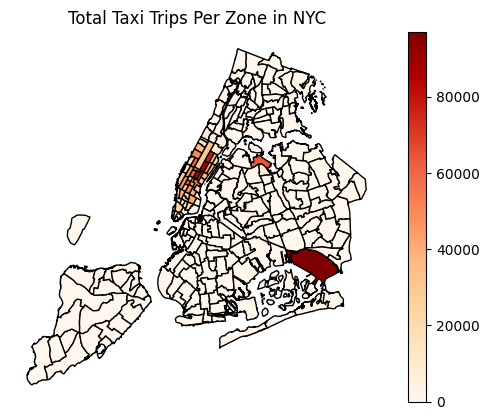

In [75]:
# Merge trip counts back to the zones GeoDataFrame
# Merge trip counts with zones GeoDataFrame
zones = zones.merge(pickup_counts[["PULocationID", "total_trips"]],
                    left_on="LocationID", right_on="PULocationID",
                    how="left")

# Fill NaN values (if some zones had no trips recorded)
zones["total_trips"].fillna(0, inplace=True)

# Display updated GeoDataFrame
print(zones[["zone", "borough", "total_trips"]].head())

# Plot the taxi zones, coloring by total trips
plt.figure(figsize=(12, 8))
zones.plot(column="total_trips", cmap="OrRd", edgecolor="black", legend=True)
plt.title("Total Taxi Trips Per Zone in NYC")
plt.axis("off")
plt.show()



The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

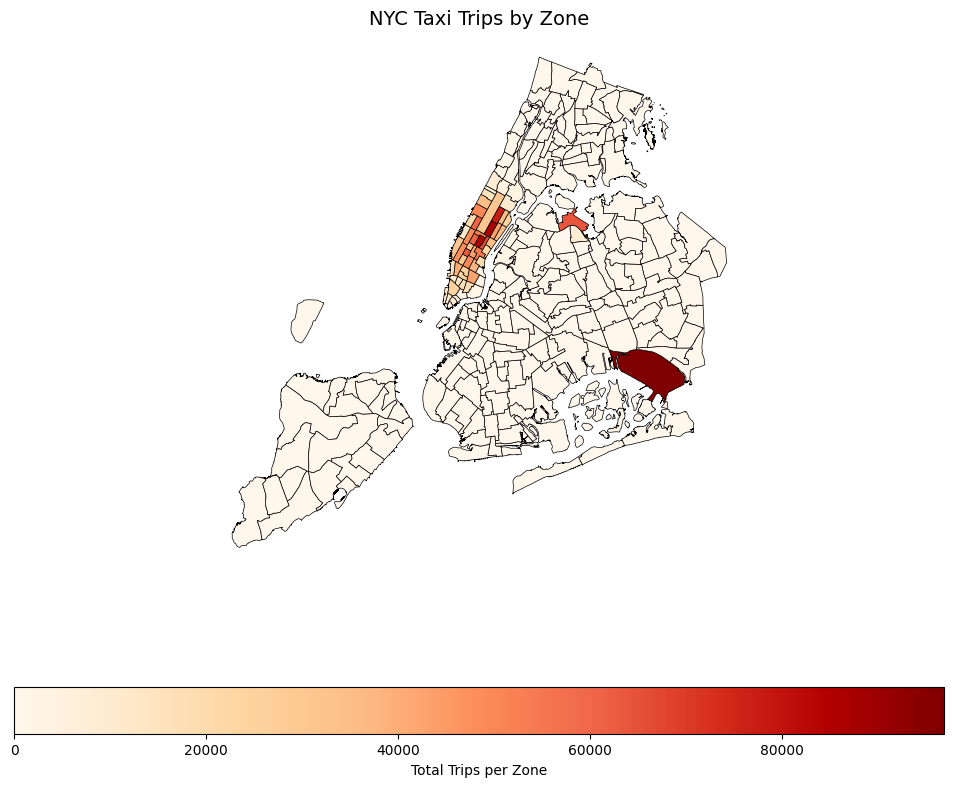

In [76]:
# Define figure and axis
import matplotlib.pyplot as plt

# Create figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 10))


# Plot the map and display it
# Plot the taxi zones, coloring by number of trips
zones.plot(
    column="total_trips",       # Data column to color by
    cmap="OrRd",                # Color scheme (Oranges-Red)
    edgecolor="black",          # Black borders for zones
    linewidth=0.5,              # Border thickness
    ax=ax,                      # Axis defined earlier
    legend=True,                # Show legend
    legend_kwds={
        "label": "Total Trips per Zone",  # Legend title
        "orientation": "horizontal"       # Legend layout
    }
)

# Add title and remove axis ticks
ax.set_title("NYC Taxi Trips by Zone", fontsize=14)
ax.set_axis_off()  # Hide axis labels

# Show the plot
plt.show()



In [77]:
# can you try displaying the zones DF sorted by the number of trips?
# Sort zones by total trips (highest to lowest)
zones_sorted = zones.sort_values(by="total_trips", ascending=False)

# Display the top 10 busiest zones
print("Top 10 Busiest Taxi Zones:")
print(zones_sorted[["zone", "borough", "total_trips"]].head(10))

# Display the bottom 10 least busy zones
print("\nBottom 10 Least Busy Taxi Zones:")
print(zones_sorted[["zone", "borough", "total_trips"]].tail(10))



Top 10 Busiest Taxi Zones:
                             zone    borough  total_trips
133                   JFK Airport     Queens      96963.0
238         Upper East Side South  Manhattan      86888.0
162                Midtown Center  Manhattan      85932.0
237         Upper East Side North  Manhattan      77505.0
163                  Midtown East  Manhattan      65624.0
139             LaGuardia Airport     Queens      64266.0
187  Penn Station/Madison Sq West  Manhattan      63452.0
231     Times Sq/Theatre District  Manhattan      61300.0
143           Lincoln Square East  Manhattan      60870.0
171                   Murray Hill  Manhattan      54482.0

Bottom 10 Least Busy Taxi Zones:
                                              zone        borough  total_trips
116                            Grymes Hill/Clifton  Staten Island          1.0
173                         New Dorp/Midland Beach  Staten Island          1.0
111                               Great Kills Park  Staten Islan

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [78]:
# Find routes which have the slowest speeds at different times of the day
import pandas as pd

# Ensure datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])

# Extract hour of the trip
df["hour"] = df["tpep_pickup_datetime"].dt.hour

# Calculate trip duration in hours
df["trip_duration_hours"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 3600

# Avoid division by zero errors
df = df[df["trip_duration_hours"] > 0]

# Compute speed (distance / duration)
df["speed_mph"] = df["trip_distance"] / df["trip_duration_hours"]

# Group by route (PULocationID → DOLocationID) and hour, then calculate average speed
slow_routes = df.groupby(["PULocationID", "DOLocationID", "hour"])["speed_mph"].mean().reset_index()

# Sort by speed in ascending order to find the slowest routes
slow_routes_sorted = slow_routes.sort_values(by="speed_mph", ascending=True)

# Display the slowest routes for different times of the day
print("Top 10 Slowest Routes Per Hour:")
print(slow_routes_sorted.head(10))

# Merge pickup and dropoff zones for better readability
slow_routes_sorted = slow_routes_sorted.merge(zones[["LocationID", "zone"]],
                                              left_on="PULocationID", right_on="LocationID",
                                              how="left").rename(columns={"zone": "pickup_zone"}).drop(columns=["LocationID"])

slow_routes_sorted = slow_routes_sorted.merge(zones[["LocationID", "zone"]],
                                              left_on="DOLocationID", right_on="LocationID",
                                              how="left").rename(columns={"zone": "dropoff_zone"}).drop(columns=["LocationID"])

# Display slowest routes with zone names
print(slow_routes_sorted[["pickup_zone", "dropoff_zone", "hour", "speed_mph"]].head(10))


Top 10 Slowest Routes Per Hour:
        PULocationID  DOLocationID  hour  speed_mph
0                  1             1     1        0.0
73654            160           186     8        0.0
87274            181            63    20        0.0
100856           230           131    23        0.0
13674             49           234    19        0.0
13683             49           264     8        0.0
95563            218           218    17        0.0
95564            218           218    19        0.0
73665            160           247    22        0.0
95565            218           218    21        0.0
                 pickup_zone                  dropoff_zone  hour  speed_mph
0             Newark Airport                Newark Airport     1        0.0
1             Middle Village  Penn Station/Madison Sq West     8        0.0
2                 Park Slope                 Cypress Hills    20        0.0
3  Times Sq/Theatre District               Jamaica Estates    23        0.0
4               

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Hourly Trip Counts:
     hour  total_trips
0      0        51178
1      1        34245
2      2        22560
3      3        14719
4      4         9434
5      5        10027
6      6        24474
7      7        48984
8      8        68290
9      9        78278
10    10        85629
11    11        93027
12    12       100999
13    13       104087
14    14       111566
15    15       114288
16    16       114288
17    17       123566
18    18       129184
19    19       115915
20    20       103438
21    21       103152
22    22        95190
23    23        74861

Busiest Hour: 18 with 129184 trips


<ipython-input-79-93dd1ebec015>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_trips["hour"], y=hourly_trips["total_trips"], palette="coolwarm")


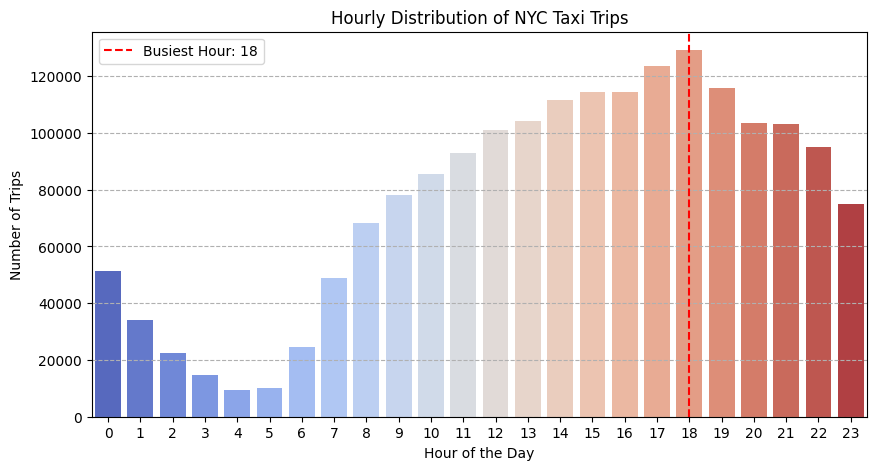

In [79]:
# Visualise the number of trips per hour and find the busiest hour
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract hour from pickup time
df["hour"] = df["tpep_pickup_datetime"].dt.hour

# Group by hour and count trips
hourly_trips = df.groupby("hour").size().reset_index(name="total_trips")

# Identify the busiest hour
busiest_hour = hourly_trips.loc[hourly_trips["total_trips"].idxmax()]

# Display results
print("Hourly Trip Counts:\n", hourly_trips)
print(f"\nBusiest Hour: {busiest_hour['hour']} with {busiest_hour['total_trips']} trips")

# Plot trips per hour
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_trips["hour"], y=hourly_trips["total_trips"], palette="coolwarm")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Distribution of NYC Taxi Trips")
plt.xticks(range(24))  # Ensure all hours are displayed
plt.grid(axis="y", linestyle="--")

# Highlight the busiest hour
plt.axvline(x=busiest_hour["hour"], color="red", linestyle="--", label=f"Busiest Hour: {busiest_hour['hour']}")
plt.legend()

# Show plot
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

Top 5 Busiest Hours:
    hour  total_trips
18    18       129184
17    17       123566
19    19       115915
16    16       114288
15    15       114288

Scaled-Up Number of Trips in the Five Busiest Hours:
    hour  total_trips  scaled_trips
18    18       129184       2583680
17    17       123566       2471320
19    19       115915       2318300
16    16       114288       2285760
15    15       114288       2285760


<ipython-input-80-3de13165926e>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_hours["hour"], y=top_5_hours["scaled_trips"], palette="Blues_r")


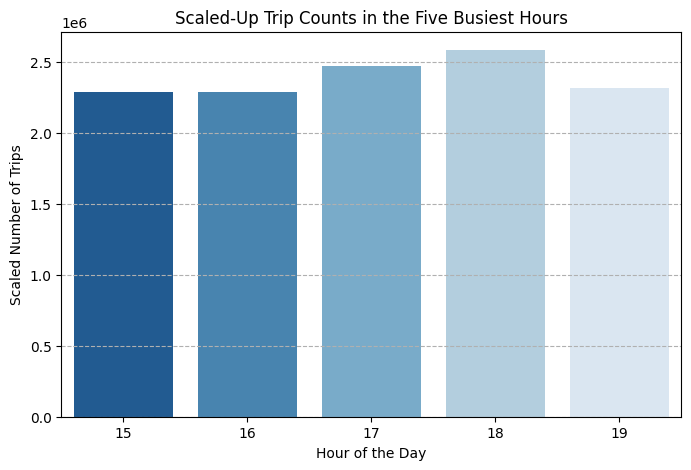

In [80]:
# Scale up the number of trips
# Sort by total trips to find the five busiest hours
top_5_hours = hourly_trips.sort_values(by="total_trips", ascending=False).head(5)

# Display top 5 busiest hours
print("Top 5 Busiest Hours:")
print(top_5_hours)

# Fill in the value of your sampling fraction and use that to scale up the numbers
# Define the sampling fraction (e.g., if we sampled 5% of the data)
sample_fraction = 0.05  # Adjust this based on the actual sampling rate

# Scale up the trip numbers
top_5_hours["scaled_trips"] = (top_5_hours["total_trips"] / sample_fraction).astype(int)

# Display scaled trip numbers
print("\nScaled-Up Number of Trips in the Five Busiest Hours:")
print(top_5_hours)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the top 5 busiest hours with scaled trip numbers
plt.figure(figsize=(8, 5))
sns.barplot(x=top_5_hours["hour"], y=top_5_hours["scaled_trips"], palette="Blues_r")
plt.xlabel("Hour of the Day")
plt.ylabel("Scaled Number of Trips")
plt.title("Scaled-Up Trip Counts in the Five Busiest Hours")
plt.grid(axis="y", linestyle="--")

# Show plot
plt.show()



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

Weekday Hourly Traffic:
    hour  total_trips
0     0        25612
1     1        13041
2     2         7044
3     3         4374
4     4         4001

Weekend Hourly Traffic:
    hour  total_trips
0     0        25566
1     1        21204
2     2        15516
3     3        10345
4     4         5433


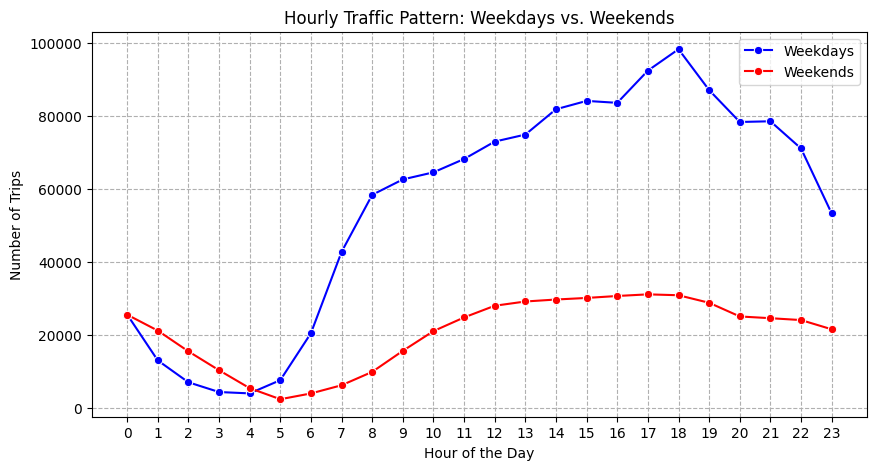

In [81]:
# Compare traffic trends for the week days and weekends
import pandas as pd

# Extract day of the week
df["day_of_week"] = df["tpep_pickup_datetime"].dt.day_name()

# Define weekdays and weekends
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
weekends = ["Saturday", "Sunday"]

# Create a new column categorizing each trip
df["is_weekend"] = df["day_of_week"].isin(weekends)
# Count trips per hour for weekdays
weekday_trips = df[df["is_weekend"] == False].groupby(df["hour"]).size().reset_index(name="total_trips")

# Count trips per hour for weekends
weekend_trips = df[df["is_weekend"] == True].groupby(df["hour"]).size().reset_index(name="total_trips")

# Display first few rows of weekday & weekend trip counts
print("Weekday Hourly Traffic:\n", weekday_trips.head())
print("\nWeekend Hourly Traffic:\n", weekend_trips.head())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Plot weekday traffic
sns.lineplot(x=weekday_trips["hour"], y=weekday_trips["total_trips"], label="Weekdays", color="blue", marker="o")

# Plot weekend traffic
sns.lineplot(x=weekend_trips["hour"], y=weekend_trips["total_trips"], label="Weekends", color="red", marker="o")

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Traffic Pattern: Weekdays vs. Weekends")
plt.xticks(range(24))  # Show all 24 hours
plt.grid(True, linestyle="--")
plt.legend()

plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

Top 10 Pickup Zones:
    PULocationID  total_pickups                          zone
0           132          96963                   JFK Airport
1           237          86888         Upper East Side South
2           161          85932                Midtown Center
3           236          77505         Upper East Side North
4           162          65624                  Midtown East
5           138          64266             LaGuardia Airport
6           186          63452  Penn Station/Madison Sq West
7           230          61300     Times Sq/Theatre District
8           142          60870           Lincoln Square East
9           170          54482                   Murray Hill

Top 10 Dropoff Zones:
    DOLocationID  total_dropoffs                       zone
0           236           81266      Upper East Side North
1           237           77554      Upper East Side South
2           161           71647             Midtown Center
3           230           56404  Times Sq/Theat

<ipython-input-82-962cb26916a1>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pickup_zones["zone"], y=top_pickup_zones["total_pickups"], palette="Blues_r")


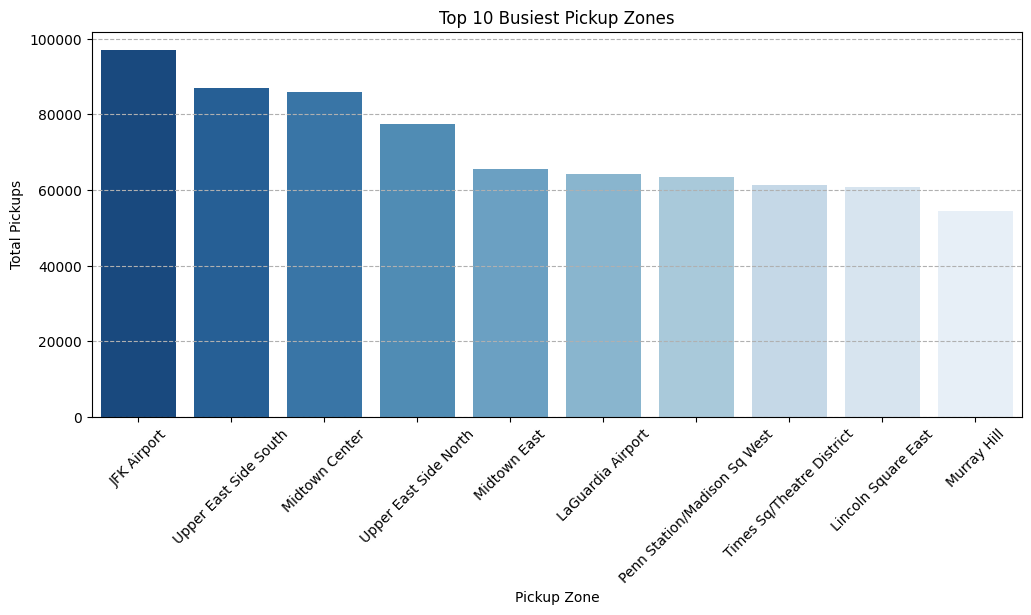

<ipython-input-82-962cb26916a1>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dropoff_zones["zone"], y=top_dropoff_zones["total_dropoffs"], palette="Reds_r")


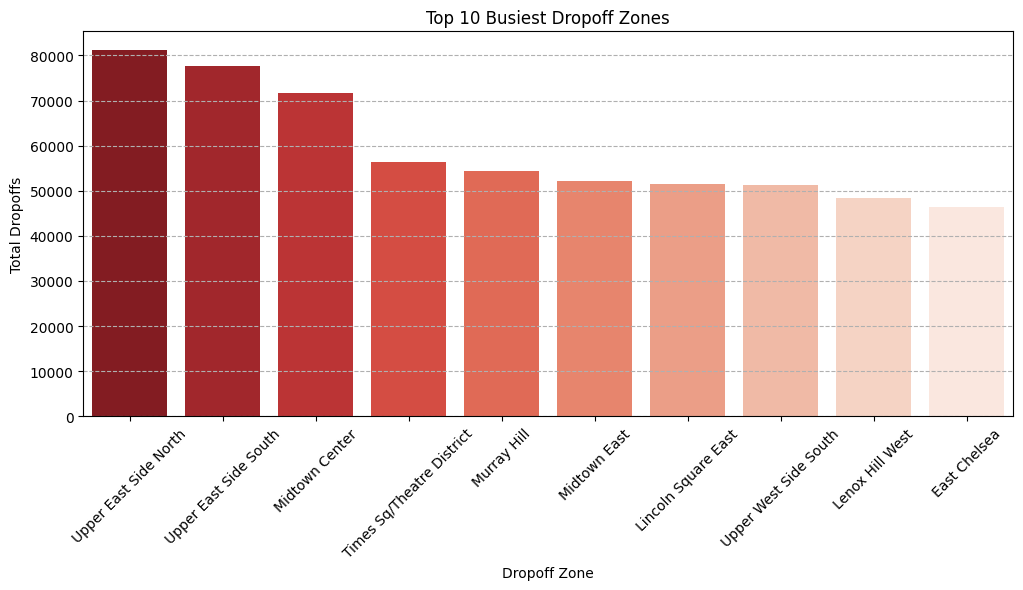

In [82]:
# Find top 10 pickup and dropoff zones

import pandas as pd

# Group by pickup location and hour to count trips
top_pickups = df.groupby(["PULocationID", "hour"]).size().reset_index(name="total_pickups")

# Group by dropoff location and hour to count trips
top_dropoffs = df.groupby(["DOLocationID", "hour"]).size().reset_index(name="total_dropoffs")

# Find the top 10 busiest pickup zones
top_pickup_zones = top_pickups.groupby("PULocationID")["total_pickups"].sum().reset_index()
top_pickup_zones = top_pickup_zones.sort_values(by="total_pickups", ascending=False).head(10)

# Find the top 10 busiest dropoff zones
top_dropoff_zones = top_dropoffs.groupby("DOLocationID")["total_dropoffs"].sum().reset_index()
top_dropoff_zones = top_dropoff_zones.sort_values(by="total_dropoffs", ascending=False).head(10)

# Merge with zone names for better readability
top_pickup_zones = top_pickup_zones.merge(zones[["LocationID", "zone"]],
                                          left_on="PULocationID", right_on="LocationID").drop(columns=["LocationID"])

top_dropoff_zones = top_dropoff_zones.merge(zones[["LocationID", "zone"]],
                                            left_on="DOLocationID", right_on="LocationID").drop(columns=["LocationID"])

# Display top 10 zones for pickups and dropoffs
print("Top 10 Pickup Zones:\n", top_pickup_zones)
print("\nTop 10 Dropoff Zones:\n", top_dropoff_zones)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top pickup zones
plt.figure(figsize=(12, 5))
sns.barplot(x=top_pickup_zones["zone"], y=top_pickup_zones["total_pickups"], palette="Blues_r")
plt.xlabel("Pickup Zone")
plt.ylabel("Total Pickups")
plt.title("Top 10 Busiest Pickup Zones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.show()

# Plot top dropoff zones
plt.figure(figsize=(12, 5))
sns.barplot(x=top_dropoff_zones["zone"], y=top_dropoff_zones["total_dropoffs"], palette="Reds_r")
plt.xlabel("Dropoff Zone")
plt.ylabel("Total Dropoffs")
plt.title("Top 10 Busiest Dropoff Zones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

Top 10 Zones with Highest Pickup-to-Dropoff Ratios:
      PULocationID  total_pickups  DOLocationID  total_dropoffs  \
72           70.0         8362.0          70.0          1004.0   
130         132.0        96963.0         132.0         20973.0   
136         138.0        64266.0         138.0         22249.0   
197         199.0            2.0           0.0             0.0   
184         186.0        63452.0         186.0         40117.0   
42           43.0        30749.0          43.0         22367.0   
112         114.0        24107.0         114.0         17539.0   
247         249.0        40396.0         249.0         30467.0   
160         162.0        65624.0         162.0         52249.0   
159         161.0        85932.0         161.0         71647.0   

     pickup_drop_ratio                          zone  
72            8.320398                 East Elmhurst  
130           4.623009                   JFK Airport  
136           2.888360             LaGuardia Airport  


<ipython-input-83-c277787f534d>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_ratios["zone"], y=top_10_ratios["pickup_drop_ratio"], palette="Blues_r")


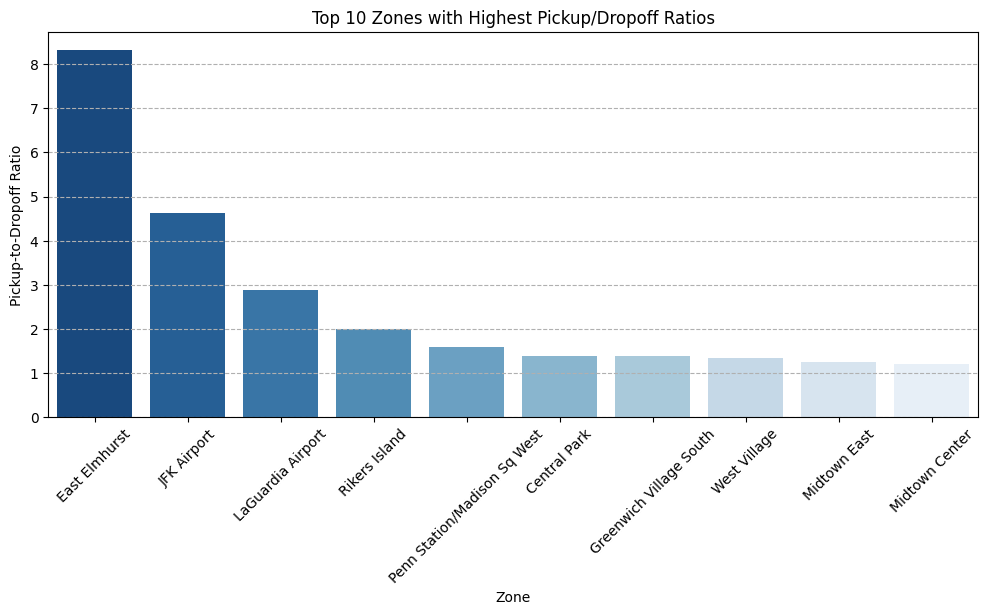

<ipython-input-83-c277787f534d>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_ratios["zone"], y=bottom_10_ratios["pickup_drop_ratio"], palette="Reds_r")


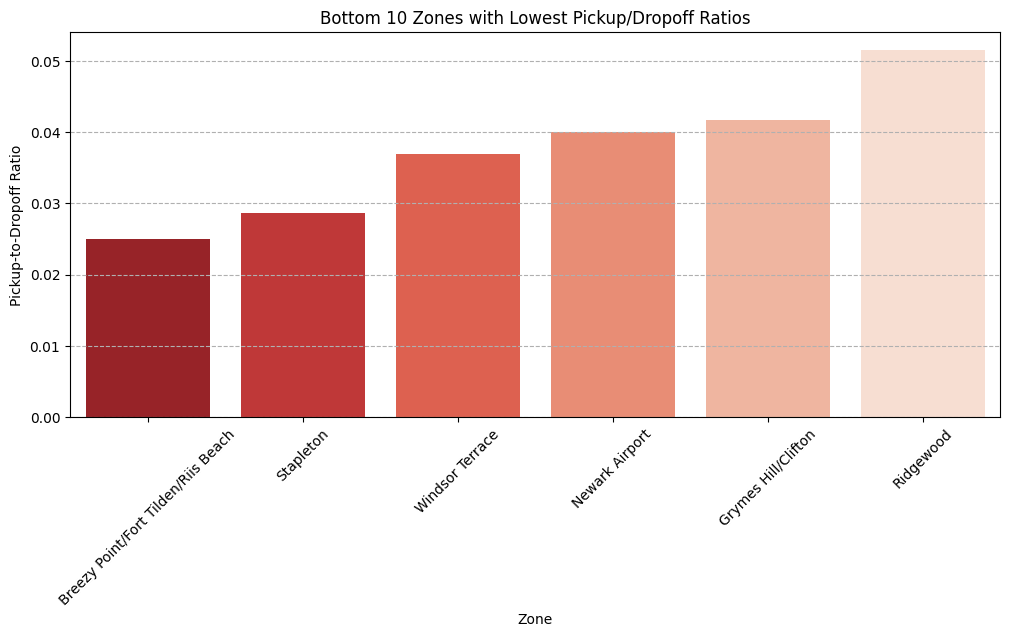

In [83]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
import pandas as pd

# Count total pickups and dropoffs per zone
pickup_counts = df.groupby("PULocationID").size().reset_index(name="total_pickups")
dropoff_counts = df.groupby("DOLocationID").size().reset_index(name="total_dropoffs")

# Merge pickup and dropoff counts
zone_ratios = pickup_counts.merge(dropoff_counts, left_on="PULocationID", right_on="DOLocationID", how="outer").fillna(0)

# Compute pickup/dropoff ratio (avoid division by zero)
zone_ratios["pickup_drop_ratio"] = zone_ratios["total_pickups"] / (zone_ratios["total_dropoffs"] + 1)  # +1 to avoid divide by zero

# Merge with zone names for better readability
zone_ratios = zone_ratios.merge(zones[["LocationID", "zone"]],
                                left_on="PULocationID", right_on="LocationID", how="left").drop(columns=["LocationID"])

# Sort to find top & bottom 10 zones
top_10_ratios = zone_ratios.sort_values(by="pickup_drop_ratio", ascending=False).head(10)
bottom_10_ratios = zone_ratios.sort_values(by="pickup_drop_ratio", ascending=True).head(10)

# Display results
print("Top 10 Zones with Highest Pickup-to-Dropoff Ratios:\n", top_10_ratios)
print("\nBottom 10 Zones with Lowest Pickup-to-Dropoff Ratios:\n", bottom_10_ratios)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 10 ratios
plt.figure(figsize=(12, 5))
sns.barplot(x=top_10_ratios["zone"], y=top_10_ratios["pickup_drop_ratio"], palette="Blues_r")
plt.xlabel("Zone")
plt.ylabel("Pickup-to-Dropoff Ratio")
plt.title("Top 10 Zones with Highest Pickup/Dropoff Ratios")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.show()

# Plot bottom 10 ratios
plt.figure(figsize=(12, 5))
sns.barplot(x=bottom_10_ratios["zone"], y=bottom_10_ratios["pickup_drop_ratio"], palette="Reds_r")
plt.xlabel("Zone")
plt.ylabel("Pickup-to-Dropoff Ratio")
plt.title("Bottom 10 Zones with Lowest Pickup/Dropoff Ratios")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.show()


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

Top 10 Nighttime Pickup Zones:
      PULocationID  total_pickups                          zone
74             79          15550                  East Village
117           132          14587                   JFK Airport
225           249          12465                  West Village
42             48          10463                  Clinton East
133           148           9619               Lower East Side
102           114           8748       Greenwich Village South
207           230           8206     Times Sq/Theatre District
166           186           6964  Penn Station/Madison Sq West
147           164           6138                 Midtown South
63             68           6047                  East Chelsea

Top 10 Nighttime Dropoff Zones:
      DOLocationID  total_dropoffs                       zone
79             79            8314               East Village
46             48            6874               Clinton East
166           170            6264                Murray Hi

<ipython-input-84-282620e63d0a>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_night_pickups["zone"], y=top_10_night_pickups["total_pickups"], palette="Blues_r")


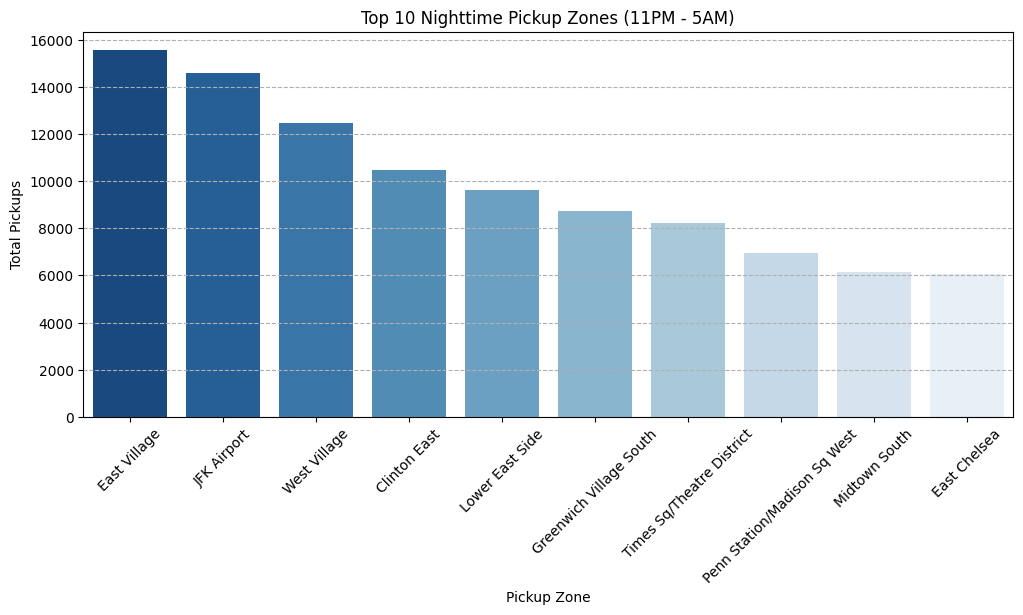

<ipython-input-84-282620e63d0a>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_night_dropoffs["zone"], y=top_10_night_dropoffs["total_dropoffs"], palette="Reds_r")


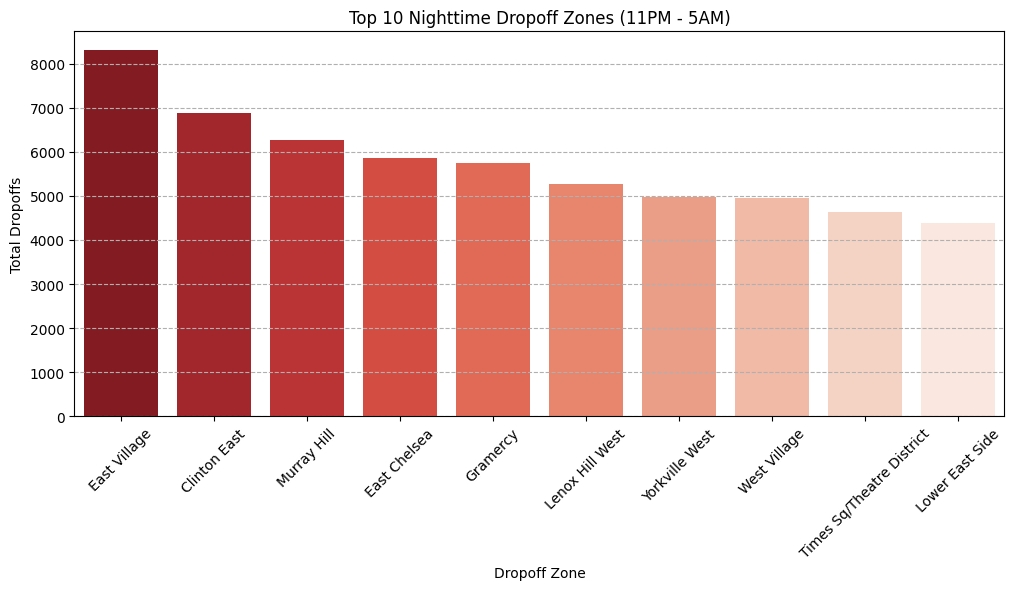

In [84]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
import pandas as pd

# Extract the hour from pickup time
df["hour"] = df["tpep_pickup_datetime"].dt.hour

# Filter for night hours (11 PM to 5 AM)
night_trips = df[(df["hour"] >= 23) | (df["hour"] <= 5)]

# Count total pickups per zone during night hours
night_pickups = night_trips.groupby("PULocationID").size().reset_index(name="total_pickups")

# Count total dropoffs per zone during night hours
night_dropoffs = night_trips.groupby("DOLocationID").size().reset_index(name="total_dropoffs")

# Merge with zone names
night_pickups = night_pickups.merge(zones[["LocationID", "zone"]],
                                    left_on="PULocationID", right_on="LocationID").drop(columns=["LocationID"])

night_dropoffs = night_dropoffs.merge(zones[["LocationID", "zone"]],
                                      left_on="DOLocationID", right_on="LocationID").drop(columns=["LocationID"])

# Get the top 10 zones for pickups & dropoffs
top_10_night_pickups = night_pickups.sort_values(by="total_pickups", ascending=False).head(10)
top_10_night_dropoffs = night_dropoffs.sort_values(by="total_dropoffs", ascending=False).head(10)

# Display results
print("Top 10 Nighttime Pickup Zones:\n", top_10_night_pickups)
print("\nTop 10 Nighttime Dropoff Zones:\n", top_10_night_dropoffs)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 10 nighttime pickup zones
plt.figure(figsize=(12, 5))
sns.barplot(x=top_10_night_pickups["zone"], y=top_10_night_pickups["total_pickups"], palette="Blues_r")
plt.xlabel("Pickup Zone")
plt.ylabel("Total Pickups")
plt.title("Top 10 Nighttime Pickup Zones (11PM - 5AM)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.show()

# Plot top 10 nighttime dropoff zones
plt.figure(figsize=(12, 5))
sns.barplot(x=top_10_night_dropoffs["zone"], y=top_10_night_dropoffs["total_dropoffs"], palette="Reds_r")
plt.xlabel("Dropoff Zone")
plt.ylabel("Total Dropoffs")
plt.title("Top 10 Nighttime Dropoff Zones (11PM - 5AM)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.show()


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Nighttime Revenue Share (11PM - 5AM): 12.07%
Daytime Revenue Share (6AM - 10PM): 87.93%


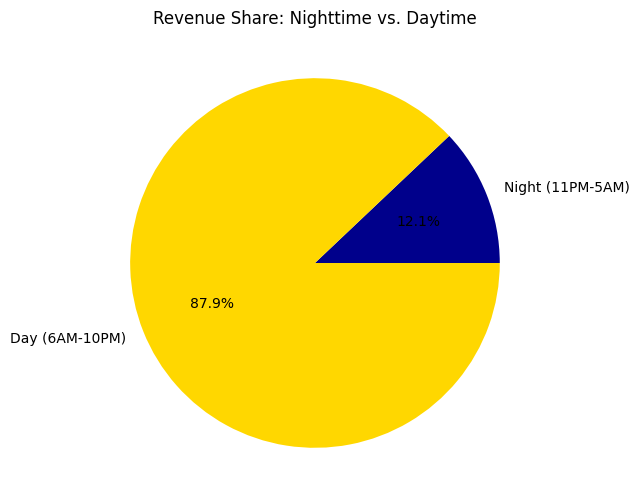

In [85]:
# Filter for night hours (11 PM to 5 AM)
import pandas as pd

# Extract the hour from pickup time
df["hour"] = df["tpep_pickup_datetime"].dt.hour

# Define nighttime (11 PM - 5 AM) and daytime (6 AM - 10 PM)
night_trips = df[(df["hour"] >= 23) | (df["hour"] <= 5)]
day_trips = df[(df["hour"] >= 6) & (df["hour"] <= 22)]

# Compute total revenue for each period
night_revenue = night_trips["total_amount"].sum()
day_revenue = day_trips["total_amount"].sum()

# Calculate revenue share percentages
total_revenue = night_revenue + day_revenue
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

# Display results
print(f"Nighttime Revenue Share (11PM - 5AM): {night_share:.2f}%")
print(f"Daytime Revenue Share (6AM - 10PM): {day_share:.2f}%")
import matplotlib.pyplot as plt

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie([night_share, day_share], labels=["Night (11PM-5AM)", "Day (6AM-10PM)"], autopct="%1.1f%%", colors=["darkblue", "gold"])
plt.title("Revenue Share: Nighttime vs. Daytime")
plt.show()


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

   passenger_count fare_per_mile_per_passenger
0              1.0                    0.015809
1              2.0                    0.009199
2              3.0                    0.005591
3              4.0                     0.00626
4              5.0                    0.002446
5              6.0                    0.001933
6              7.0                    0.001873
7              8.0                    0.040964
8              9.0                    0.108893


<ipython-input-86-63d1a76808e5>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fare_per_passenger_stats["passenger_count"], y=fare_per_passenger_stats["fare_per_mile_per_passenger"], palette="Blues_r")


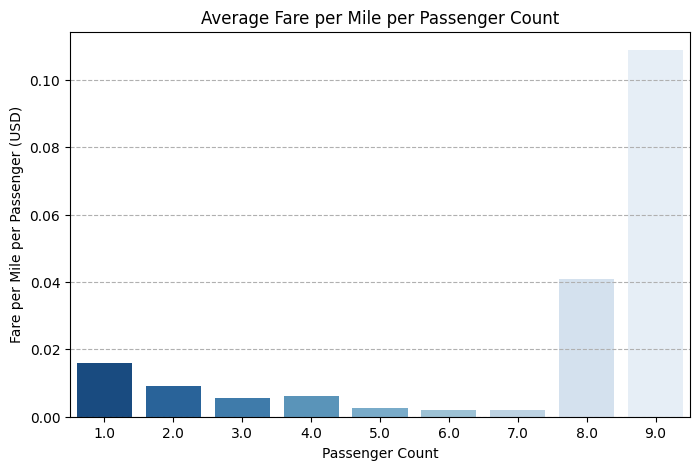

In [86]:
# Analyse the fare per mile per passenger for different passenger counts
import pandas as pd

# Filter out trips where trip_distance is zero to avoid division errors
df_valid = df[df["trip_distance"] > 0].copy()

# Calculate fare per mile
df_valid["fare_per_mile"] = df_valid["fare_amount"] / df_valid["trip_distance"]

# Calculate fare per mile per passenger
df_valid["fare_per_mile_per_passenger"] = df_valid["fare_per_mile"] / df_valid["passenger_count"]

# Remove infinite or NaN values (e.g., division by zero cases)
df_valid = df_valid.replace([float("inf"), -float("inf")], None).dropna(subset=["fare_per_mile_per_passenger"])

# Compute average fare per mile per passenger for different passenger counts
fare_per_passenger_stats = df_valid.groupby("passenger_count")["fare_per_mile_per_passenger"].mean().reset_index()

# Display results
print(fare_per_passenger_stats)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot average fare per mile per passenger
plt.figure(figsize=(8, 5))
sns.barplot(x=fare_per_passenger_stats["passenger_count"], y=fare_per_passenger_stats["fare_per_mile_per_passenger"], palette="Blues_r")
plt.xlabel("Passenger Count")
plt.ylabel("Fare per Mile per Passenger (USD)")
plt.title("Average Fare per Mile per Passenger Count")
plt.grid(axis="y", linestyle="--")
plt.show()



**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

Average Fare per Mile by Hour:
    hour  fare_per_mile
0     0       0.015054
1     1       0.016124
2     2       0.014218
3     3       0.015545
4     4       0.020020

Average Fare per Mile by Day of the Week:
   day_of_week  fare_per_mile
0      Monday       0.015708
1     Tuesday       0.017387
2   Wednesday       0.015907
3    Thursday       0.016122
4      Friday       0.015606
5    Saturday       0.015627
6      Sunday       0.017922


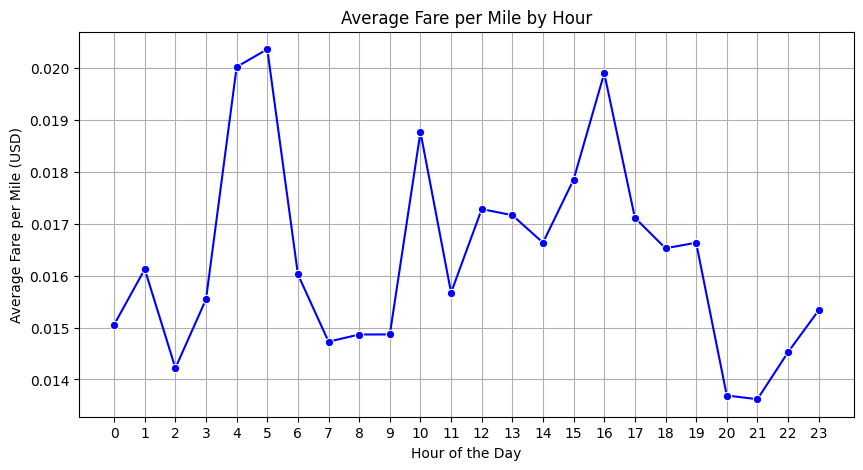

<ipython-input-87-f260706fbd56>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_fare_per_mile["day_of_week"], y=daily_fare_per_mile["fare_per_mile"], palette="coolwarm")


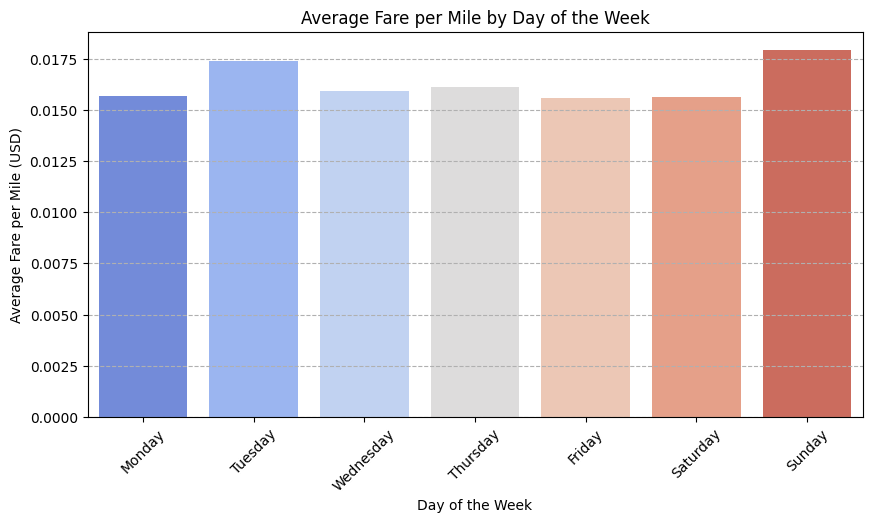

In [87]:
# Compare the average fare per mile for different days and for different times of the day
import pandas as pd

# Filter out trips where trip_distance is zero to avoid division errors
df_valid = df[df["trip_distance"] > 0].copy()

# Calculate fare per mile
df_valid["fare_per_mile"] = df_valid["fare_amount"] / df_valid["trip_distance"]

# Remove infinite or NaN values (e.g., division by zero cases)
df_valid = df_valid.replace([float("inf"), -float("inf")], None).dropna(subset=["fare_per_mile"])

# Extract hour and day of the week
df_valid["hour"] = df_valid["tpep_pickup_datetime"].dt.hour
df_valid["day_of_week"] = df_valid["tpep_pickup_datetime"].dt.day_name()

# Average fare per mile by hour
hourly_fare_per_mile = df_valid.groupby("hour")["fare_per_mile"].mean().reset_index()

# Average fare per mile by day of the week
daily_fare_per_mile = df_valid.groupby("day_of_week")["fare_per_mile"].mean().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]).reset_index()

# Display results
print("Average Fare per Mile by Hour:\n", hourly_fare_per_mile.head())
print("\nAverage Fare per Mile by Day of the Week:\n", daily_fare_per_mile)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_fare_per_mile["hour"], y=hourly_fare_per_mile["fare_per_mile"], marker="o", color="blue")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Average Fare per Mile by Hour")
plt.xticks(range(24))
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=daily_fare_per_mile["day_of_week"], y=daily_fare_per_mile["fare_per_mile"], palette="coolwarm")
plt.xlabel("Day of the Week")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Average Fare per Mile by Day of the Week")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

   VendorID  hour  fare_per_mile
0         1     0       0.009724
1         1     1       0.010098
2         1     2       0.009908
3         1     3       0.009313
4         1     4       0.010738


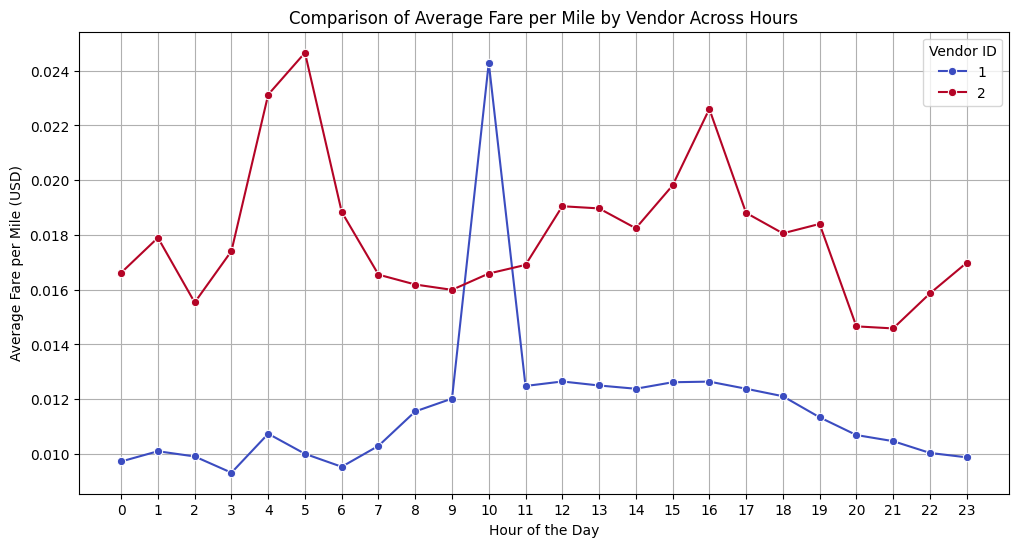

In [89]:
# Compare fare per mile for different vendors
import pandas as pd

# Filter out trips where trip_distance is zero to avoid division errors
df_valid = df[df["trip_distance"] > 0].copy()

# Calculate fare per mile
df_valid["fare_per_mile"] = df_valid["fare_amount"] / df_valid["trip_distance"]

# Remove infinite or NaN values (e.g., division by zero cases)
df_valid = df_valid.replace([float("inf"), -float("inf")], None).dropna(subset=["fare_per_mile"])

# Extract hour from pickup time
df_valid["hour"] = df_valid["tpep_pickup_datetime"].dt.hour

# Group by VendorID and hour, then calculate mean fare per mile
vendor_fare_per_mile = df_valid.groupby(["VendorID", "hour"])["fare_per_mile"].mean().reset_index()

# Display first few rows
print(vendor_fare_per_mile.head())
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Line plot to compare vendors
sns.lineplot(x="hour", y="fare_per_mile", hue="VendorID", data=vendor_fare_per_mile, marker="o", palette="coolwarm")

plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Comparison of Average Fare per Mile by Vendor Across Hours")
plt.xticks(range(24))
plt.grid()
plt.legend(title="Vendor ID")
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


<ipython-input-90-34866b2b8d87>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vendor_fare_tiers = df_valid.groupby(["VendorID", "distance_tier"])["fare_per_mile"].mean().reset_index()


   VendorID distance_tier  fare_per_mile
0         1     0-2 miles       0.012247
1         1     2-5 miles            NaN
2         1      5+ miles            NaN
3         2     0-2 miles       0.017739
4         2     2-5 miles            NaN
5         2      5+ miles            NaN


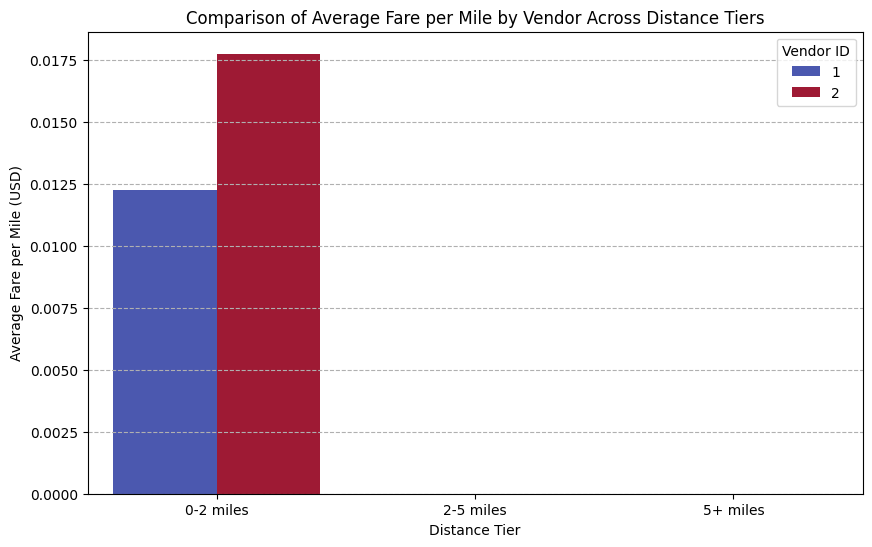

In [90]:
# Defining distance tiers
import pandas as pd

# Filter out trips where trip_distance is zero to avoid division errors
df_valid = df[df["trip_distance"] > 0].copy()

# Calculate fare per mile
df_valid["fare_per_mile"] = df_valid["fare_amount"] / df_valid["trip_distance"]

# Remove infinite or NaN values (e.g., division by zero cases)
df_valid = df_valid.replace([float("inf"), -float("inf")], None).dropna(subset=["fare_per_mile"])

# Define distance categories
bins = [0, 2, 5, float("inf")]  # 0-2 miles, 2-5 miles, 5+ miles
labels = ["0-2 miles", "2-5 miles", "5+ miles"]

# Create a new column for distance tiers
df_valid["distance_tier"] = pd.cut(df_valid["trip_distance"], bins=bins, labels=labels)

# Group by VendorID and distance tier, then calculate mean fare per mile
vendor_fare_tiers = df_valid.groupby(["VendorID", "distance_tier"])["fare_per_mile"].mean().reset_index()

# Display results
print(vendor_fare_tiers)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Bar plot comparing vendors across distance tiers
sns.barplot(x="distance_tier", y="fare_per_mile", hue="VendorID", data=vendor_fare_tiers, palette="coolwarm")

plt.xlabel("Distance Tier")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Comparison of Average Fare per Mile by Vendor Across Distance Tiers")
plt.grid(axis="y", linestyle="--")
plt.legend(title="Vendor ID")
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

<ipython-input-91-5f72c32dfb34>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_by_distance = df_valid.groupby("distance_category")["tip_percentage"].mean().reset_index()


Tip Percentage by Distance:
   distance_category  tip_percentage
0         0-2 miles    13217.281387
1         2-5 miles             NaN
2        5-10 miles             NaN
3         10+ miles             NaN
Tip Percentage by Passenger Count:
    passenger_count  tip_percentage
0              0.0    12761.671360
1              1.0    14118.358952
2              2.0    13128.923524
3              3.0    12172.922940
4              4.0    11152.362142
5              5.0    13167.749259
6              6.0    13210.316946
7              7.0     3395.573925
8              8.0     8808.039161
9              9.0     7901.261938


<ipython-input-91-5f72c32dfb34>:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_by_time = df_valid.groupby("time_of_day")["tip_percentage"].mean().reset_index()
<ipython-input-91-5f72c32dfb34>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tip_by_distance["distance_category"], y=tip_by_distance["tip_percentage"], palette="Blues_r")


Tip Percentage by Time of Day:
              time_of_day  tip_percentage
0  Late Night (12AM-6AM)    14096.057174
1     Morning (6AM-12PM)    12468.121379
2   Afternoon (12PM-6PM)    14353.046494
3     Evening (6PM-12AM)    14166.860872


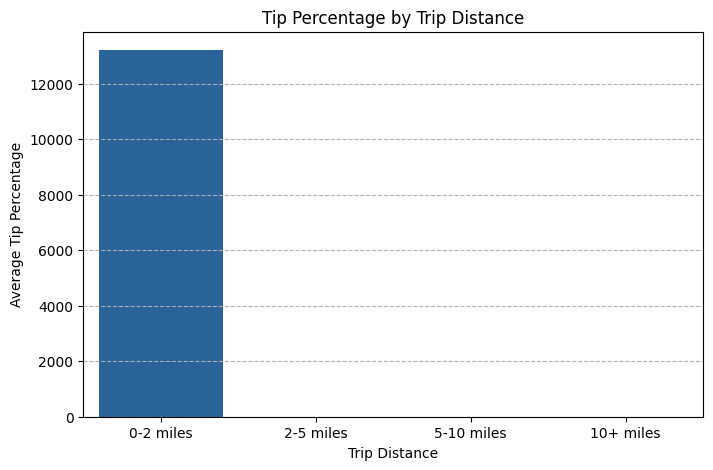

<ipython-input-91-5f72c32dfb34>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tip_by_passenger["passenger_count"], y=tip_by_passenger["tip_percentage"], palette="coolwarm")


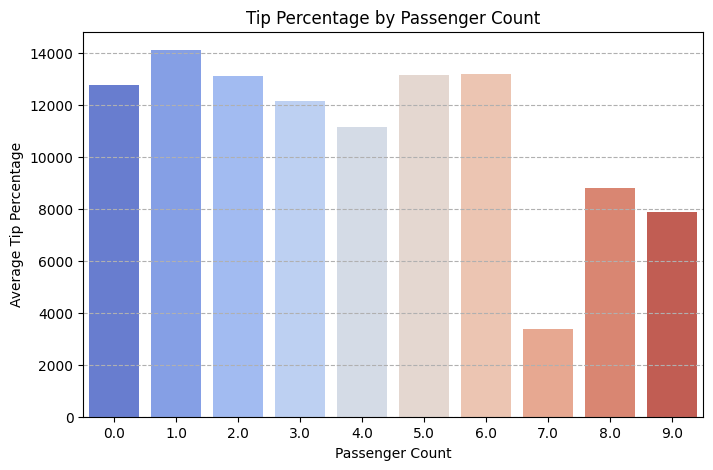

<ipython-input-91-5f72c32dfb34>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tip_by_time["time_of_day"], y=tip_by_time["tip_percentage"], palette="Greens_r")


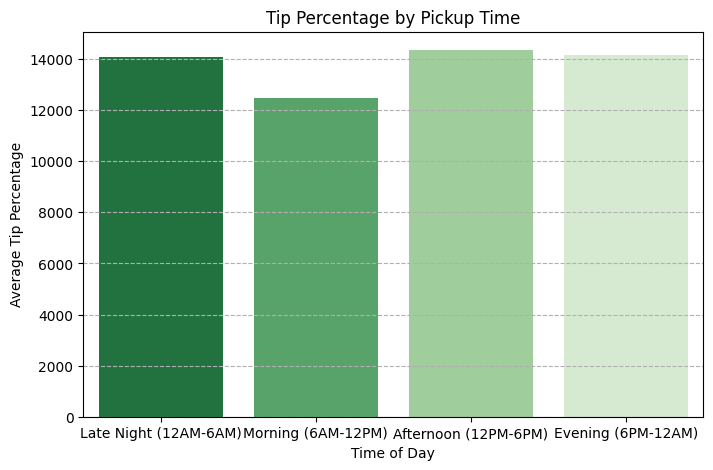

In [91]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
import pandas as pd

# Filter out trips with zero fare_amount to avoid division errors
df_valid = df[df["fare_amount"] > 0].copy()

# Calculate tip percentage
df_valid["tip_percentage"] = (df_valid["tip_amount"] / df_valid["fare_amount"]) * 100

# Remove NaN and infinite values (e.g., if fare_amount was zero)
df_valid = df_valid.replace([float("inf"), -float("inf")], None).dropna(subset=["tip_percentage"])

# Define distance categories
bins = [0, 2, 5, 10, float("inf")]  # 0-2 miles, 2-5 miles, 5-10 miles, 10+ miles
labels = ["0-2 miles", "2-5 miles", "5-10 miles", "10+ miles"]

# Assign trips to distance bins
df_valid["distance_category"] = pd.cut(df_valid["trip_distance"], bins=bins, labels=labels)

# Compute average tip percentage per distance category
tip_by_distance = df_valid.groupby("distance_category")["tip_percentage"].mean().reset_index()

# Display results
print("Tip Percentage by Distance:\n", tip_by_distance)
# Compute average tip percentage per passenger count
tip_by_passenger = df_valid.groupby("passenger_count")["tip_percentage"].mean().reset_index()

# Display results
print("Tip Percentage by Passenger Count:\n", tip_by_passenger)

# Extract pickup hour
df_valid["hour"] = df_valid["tpep_pickup_datetime"].dt.hour

# Define time categories
df_valid["time_of_day"] = pd.cut(df_valid["hour"],
                                 bins=[0, 6, 12, 18, 24],
                                 labels=["Late Night (12AM-6AM)", "Morning (6AM-12PM)", "Afternoon (12PM-6PM)", "Evening (6PM-12AM)"],
                                 include_lowest=True)

# Compute average tip percentage per time of day
tip_by_time = df_valid.groupby("time_of_day")["tip_percentage"].mean().reset_index()

# Display results
print("Tip Percentage by Time of Day:\n", tip_by_time)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot tip percentage by distance
plt.figure(figsize=(8, 5))
sns.barplot(x=tip_by_distance["distance_category"], y=tip_by_distance["tip_percentage"], palette="Blues_r")
plt.xlabel("Trip Distance")
plt.ylabel("Average Tip Percentage")
plt.title("Tip Percentage by Trip Distance")
plt.grid(axis="y", linestyle="--")
plt.show()

# Plot tip percentage by passenger count
plt.figure(figsize=(8, 5))
sns.barplot(x=tip_by_passenger["passenger_count"], y=tip_by_passenger["tip_percentage"], palette="coolwarm")
plt.xlabel("Passenger Count")
plt.ylabel("Average Tip Percentage")
plt.title("Tip Percentage by Passenger Count")
plt.grid(axis="y", linestyle="--")
plt.show()

# Plot tip percentage by pickup time
plt.figure(figsize=(8, 5))
sns.barplot(x=tip_by_time["time_of_day"], y=tip_by_time["tip_percentage"], palette="Greens_r")
plt.xlabel("Time of Day")
plt.ylabel("Average Tip Percentage")
plt.title("Tip Percentage by Pickup Time")
plt.grid(axis="y", linestyle="--")
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Low Tip Trips: 409729
High Tip Trips: 1420814
Low Tip Trips: 409729
High Tip Trips: 1420814
Average Trip Distance for Low Tips (<10%): 0.02 miles
Average Trip Distance for High Tips (>25%): 0.02 miles
Passenger Count Distribution (Low vs. High Tips):
                  Low Tips     High Tips
passenger_count                        
1.0              0.723139  7.602797e-01
2.0              0.161394  1.485451e-01
3.0              0.044744  3.566547e-02
4.0              0.030945  1.818394e-02
0.0              0.018952  1.536373e-02
5.0              0.012508  1.319525e-02
6.0              0.008301  8.757656e-03
7.0              0.000007  7.038219e-07
9.0              0.000005  2.111466e-06
8.0              0.000005  6.334397e-06
Payment Method Distribution (Low vs. High Tips):
                     Low Tips  High Tips
payment_type_label                     
Cash                0.771041   0.000016
Credit Card         0.174374   0.999915
Dispute             0.033068   0.000019
No Charge         

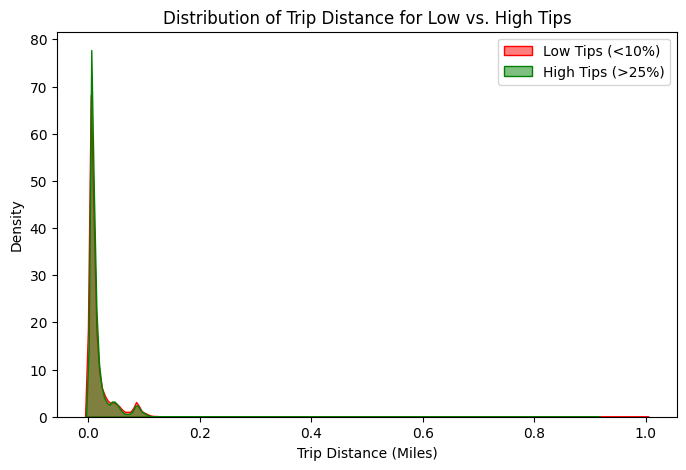

In [93]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
import pandas as pd

# Define tip categories
low_tips = df_valid[df_valid["tip_percentage"] < 10].copy()
high_tips = df_valid[df_valid["tip_percentage"] > 25].copy()

# Display basic statistics
print(f"Low Tip Trips: {len(low_tips)}")
print(f"High Tip Trips: {len(high_tips)}")

import pandas as pd

# Define tip categories
low_tips = df_valid[df_valid["tip_percentage"] < 10].copy()
high_tips = df_valid[df_valid["tip_percentage"] > 25].copy()

# Display basic statistics
print(f"Low Tip Trips: {len(low_tips)}")
print(f"High Tip Trips: {len(high_tips)}")

avg_distance_low = low_tips["trip_distance"].mean()
avg_distance_high = high_tips["trip_distance"].mean()

print(f"Average Trip Distance for Low Tips (<10%): {avg_distance_low:.2f} miles")
print(f"Average Trip Distance for High Tips (>25%): {avg_distance_high:.2f} miles")

passenger_comparison = pd.concat([
    low_tips["passenger_count"].value_counts(normalize=True).rename("Low Tips"),
    high_tips["passenger_count"].value_counts(normalize=True).rename("High Tips")
], axis=1).fillna(0)

print("Passenger Count Distribution (Low vs. High Tips):\n", passenger_comparison)
# Map payment_type codes to readable labels
payment_labels = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided Trip"
}

low_tips["payment_type_label"] = low_tips["payment_type"].map(payment_labels)
high_tips["payment_type_label"] = high_tips["payment_type"].map(payment_labels)

# Compare payment method distribution
payment_comparison = pd.concat([
    low_tips["payment_type_label"].value_counts(normalize=True).rename("Low Tips"),
    high_tips["payment_type_label"].value_counts(normalize=True).rename("High Tips")
], axis=1).fillna(0)

print("Payment Method Distribution (Low vs. High Tips):\n", payment_comparison)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.kdeplot(low_tips["trip_distance"], label="Low Tips (<10%)", fill=True, color="red", alpha=0.5)
sns.kdeplot(high_tips["trip_distance"], label="High Tips (>25%)", fill=True, color="green", alpha=0.5)
plt.xlabel("Trip Distance (Miles)")
plt.ylabel("Density")
plt.title("Distribution of Trip Distance for Low vs. High Tips")
plt.legend()
plt.show()
# plt.figure(figsize=(10, 5))
# sns.lineplot(x=hourly_comparison.index, y=hourly_comparison["Low Tips"], label="Low Tips (<10%)", color="red", marker="o")
# sns.lineplot(x=hourly_comparison.index, y=hourly_comparison["High Tips"], label="High Tips (>25%)", color="green", marker="o")
# plt.xlabel("Hour of the Day")
# plt.ylabel("Number of Trips")
# plt.title("Hourly Distribution of Low vs. High Tips")
# plt.grid()
# plt.legend()
# plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

Average Passenger Count by Hour:
    hour  passenger_count
0     0         1.417191
1     1         1.421288
2     2         1.436037
3     3         1.443101
4     4         1.392940
Average Passenger Count by Day:
   day_of_week  passenger_count
0      Monday         1.345154
1     Tuesday         1.317328
2   Wednesday         1.313756
3    Thursday         1.327344
4      Friday         1.383877
5    Saturday         1.463231
6      Sunday         1.447616


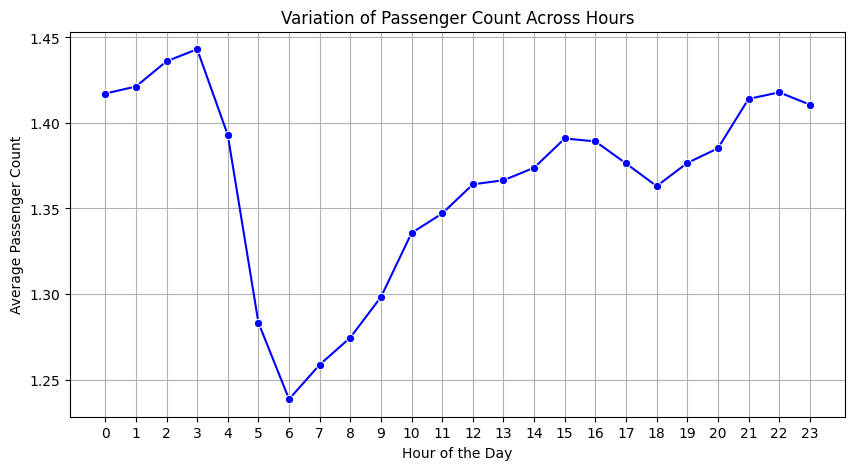

<ipython-input-94-e6b076e2f568>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=passenger_by_day["day_of_week"], y=passenger_by_day["passenger_count"], palette="coolwarm")


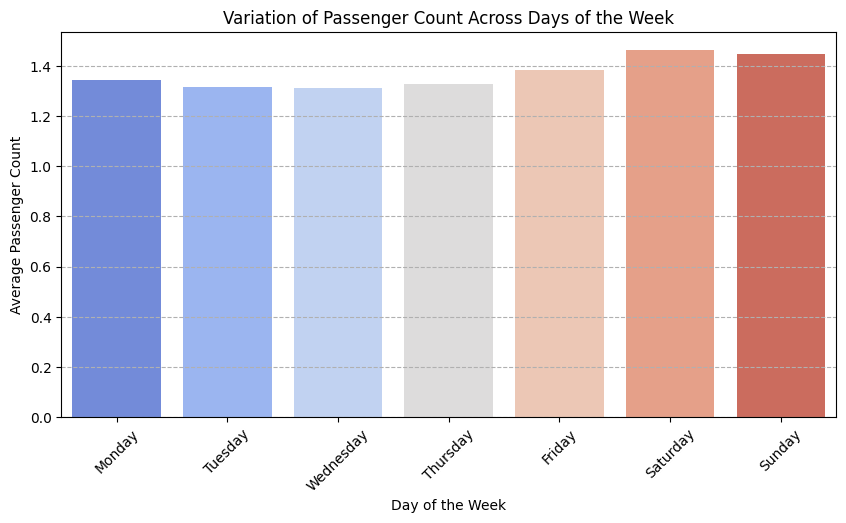

In [94]:
# See how passenger count varies across hours and days
import pandas as pd

# Group by hour and compute average passenger count
passenger_by_hour = df.groupby("hour")["passenger_count"].mean().reset_index()

# Display results
print("Average Passenger Count by Hour:\n", passenger_by_hour.head())

# Group by day of the week and compute average passenger count
passenger_by_day = df.groupby("day_of_week")["passenger_count"].mean().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]).reset_index()

# Display results
print("Average Passenger Count by Day:\n", passenger_by_day)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(x=passenger_by_hour["hour"], y=passenger_by_hour["passenger_count"], marker="o", color="blue")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Passenger Count")
plt.title("Variation of Passenger Count Across Hours")
plt.xticks(range(24))
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=passenger_by_day["day_of_week"], y=passenger_by_day["passenger_count"], palette="coolwarm")
plt.xlabel("Day of the Week")
plt.ylabel("Average Passenger Count")
plt.title("Variation of Passenger Count Across Days of the Week")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.show()




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

Top 10 Zones with Highest Average Passenger Counts:
      PULocationID  passenger_count                     zone
5               6         1.875000  Arrochar/Fort Wadsworth
198           204         1.800000        Rossville/Woodrow
189           195         1.781095                 Red Hook
11             12         1.724390             Battery Park
58             58         1.666667             Country Club
172           178         1.666667      Ocean Parkway South
0               1         1.582160           Newark Airport
66             66         1.576017       DUMBO/Vinegar Hill
188           194         1.539683          Randalls Island
254           261         1.531959       World Trade Center

Bottom 10 Zones with Lowest Average Passenger Counts:
      PULocationID  passenger_count                     zone
167           172         1.000000   New Dorp/Midland Beach
162           167         1.000000       Morrisania/Melrose
71             71         1.000000   East Flatbush/

<ipython-input-95-77292a8b9458>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=passenger_by_zone_sorted["zone"][:10], y=passenger_by_zone_sorted["passenger_count"][:10], palette="Blues_r")


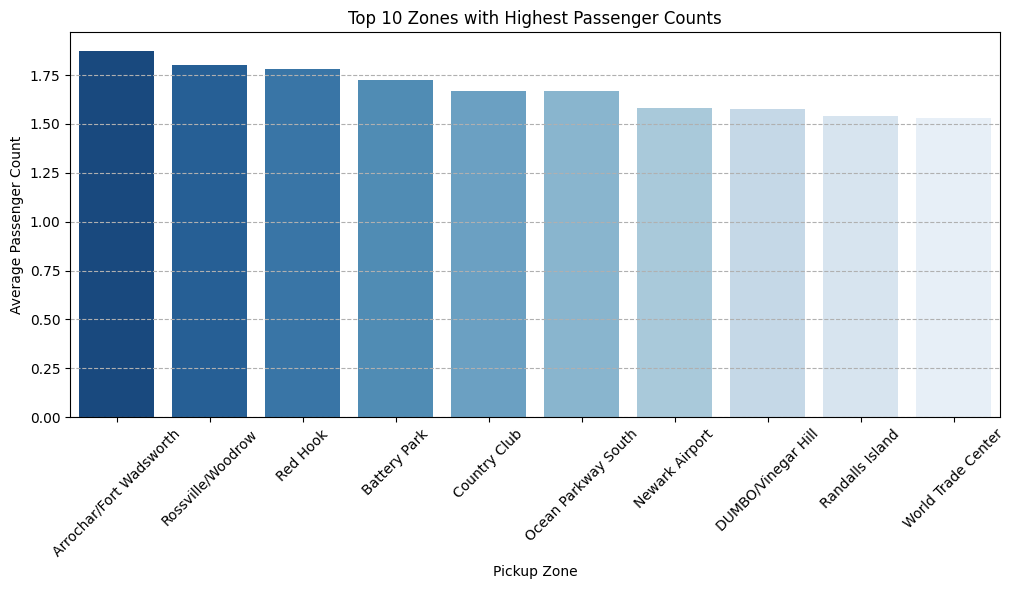

<ipython-input-95-77292a8b9458>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=passenger_by_zone_sorted["zone"][-10:], y=passenger_by_zone_sorted["passenger_count"][-10:], palette="Reds_r")


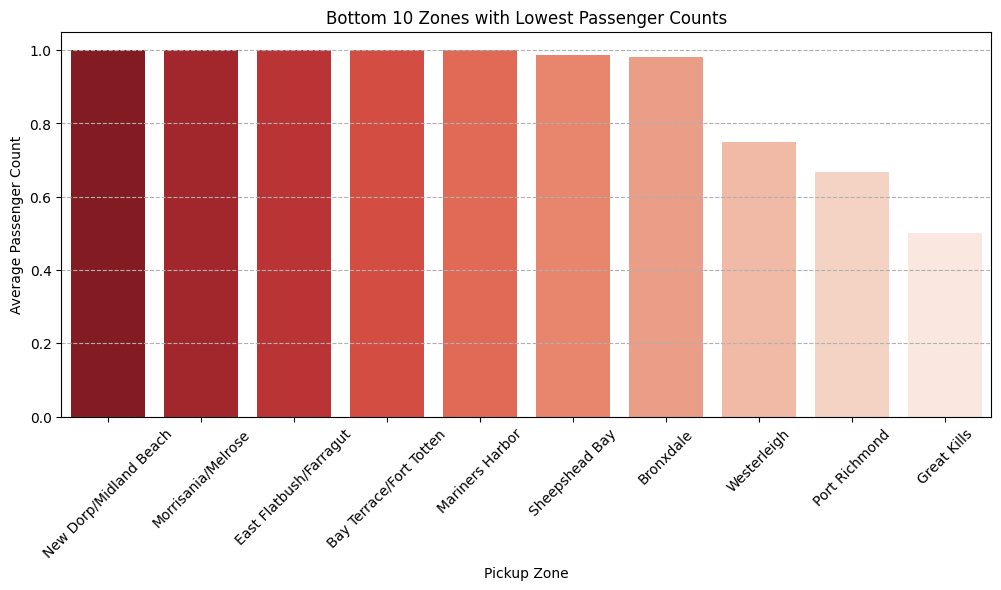

In [95]:
# How does passenger count vary across zones
import pandas as pd

# Group by pickup location and compute average passenger count
passenger_by_zone = df.groupby("PULocationID")["passenger_count"].mean().reset_index()

# Merge with zone names for better readability
passenger_by_zone = passenger_by_zone.merge(zones[["LocationID", "zone"]],
                                            left_on="PULocationID", right_on="LocationID").drop(columns=["LocationID"])

# Sort zones by average passenger count
passenger_by_zone_sorted = passenger_by_zone.sort_values(by="passenger_count", ascending=False)

# Display top and bottom 10 zones
print("Top 10 Zones with Highest Average Passenger Counts:\n", passenger_by_zone_sorted.head(10))
print("\nBottom 10 Zones with Lowest Average Passenger Counts:\n", passenger_by_zone_sorted.tail(10))

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.barplot(x=passenger_by_zone_sorted["zone"][:10], y=passenger_by_zone_sorted["passenger_count"][:10], palette="Blues_r")
plt.xlabel("Pickup Zone")
plt.ylabel("Average Passenger Count")
plt.title("Top 10 Zones with Highest Passenger Counts")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.show()
plt.figure(figsize=(12, 5))
sns.barplot(x=passenger_by_zone_sorted["zone"][-10:], y=passenger_by_zone_sorted["passenger_count"][-10:], palette="Reds_r")
plt.xlabel("Pickup Zone")
plt.ylabel("Average Passenger Count")
plt.title("Bottom 10 Zones with Lowest Passenger Counts")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.show()


In [98]:
# # For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# # Create a new column for the average passenger count in each zone.
# import pandas as pd

# # Group by pickup location and compute the average passenger count
# passenger_by_zone = df.groupby("PULocationID")["passenger_count"].mean().reset_index()

# # Merge with zone names for better readability
# passenger_by_zone = passenger_by_zone.merge(zones[["LocationID", "zone"]],
#                                             left_on="PULocationID", right_on="LocationID").drop(columns=["LocationID"])

# # Rename column for clarity
# passenger_by_zone.rename(columns={"passenger_count": "avg_passenger_count"}, inplace=True)

# # Display the first few rows
# print(passenger_by_zone.head())

# # Merge the average passenger count into the zones_with_trips GeoDataFrame
# zones_with_trips = zones_with_trips.merge(passenger_by_zone,
#                                           left_on="LocationID", right_on="PULocationID",
#                                           how="left")

# # Fill NaN values (zones without trips may have missing values)
# zones_with_trips["avg_passenger_count"].fillna(0, inplace=True)

# # Display updated GeoDataFrame
# print(zones_with_trips[["zone", "avg_passenger_count"]].head())
# import matplotlib.pyplot as plt

# # Plot the NYC map, coloring by average passenger count
# fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# zones_with_trips.plot(
#     column="avg_passenger_count",
#     cmap="OrRd",
#     edgecolor="black",
#     linewidth=0.5,
#     ax=ax,
#     legend=True,
#     legend_kwds={"label": "Average Passenger Count", "orientation": "horizontal"}
# )

# ax.set_title("Average Passenger Count Across NYC Taxi Zones")
# ax.set_axis_off()
# plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Frequency of Surcharges Applied:
                       Total Occurrences
extra                           1134248
mta_tax                         1814365
congestion_surcharge            1690260
airport_fee                      161169
Top 10 Pickup Zones with Highest Surcharge Occurrences:
      PULocationID      extra   mta_tax  congestion_surcharge  airport_fee  \
133           138  403375.79  31762.10              102700.0    103240.75   
127           132  146728.95  47441.15              118930.0    146936.00   
156           161  141289.00  42606.70              213125.0        25.25   
231           237  126252.48  43338.90              216635.0        11.50   
230           236  109375.90  38667.60              192727.5         5.00   
157           162  104607.80  32578.30              162950.0        22.75   
224           230   99499.50  30103.30              150680.0        44.50   
180           186   87458.67  31498.70              157642.5        18.75   
137           14

<ipython-input-99-719376e69722>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=surcharge_df.index, y=surcharge_df["Total Occurrences"], palette="Blues_r")


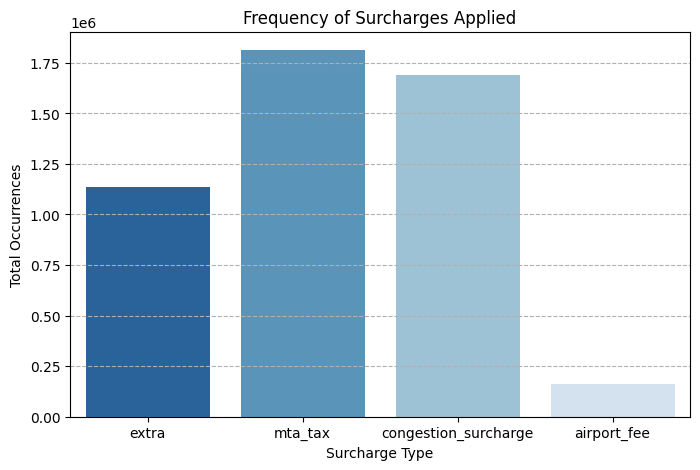

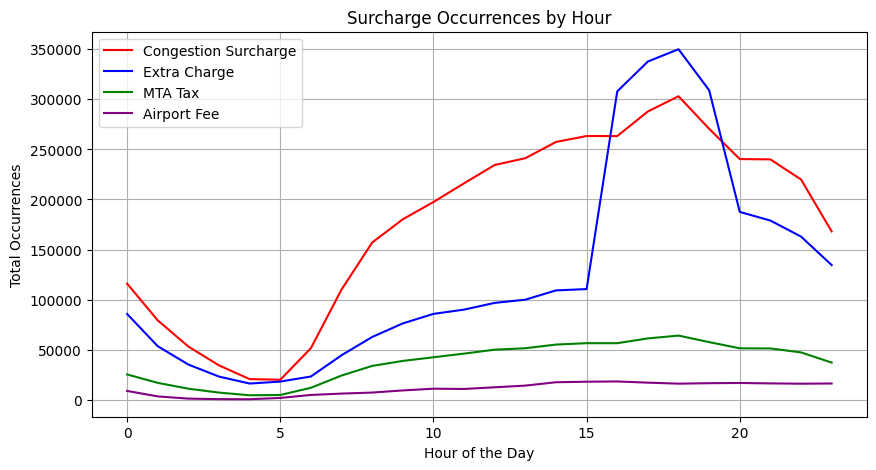

In [99]:
# How often is each surcharge applied?
import pandas as pd

# Count how often each surcharge is applied
surcharge_counts = {
    "extra": (df["extra"] > 0).sum(),
    "mta_tax": (df["mta_tax"] > 0).sum(),
    "congestion_surcharge": (df["congestion_surcharge"] > 0).sum(),
    "airport_fee": (df["airport_fee"] > 0).sum()
}

# Convert to DataFrame for easier visualization
surcharge_df = pd.DataFrame.from_dict(surcharge_counts, orient="index", columns=["Total Occurrences"])

# Display results
print("Frequency of Surcharges Applied:\n", surcharge_df)

# Group by pickup location and count occurrences of each surcharge
surcharge_by_zone = df.groupby("PULocationID")[["extra", "mta_tax", "congestion_surcharge", "airport_fee"]].sum().reset_index()

# Merge with zone names
surcharge_by_zone = surcharge_by_zone.merge(zones[["LocationID", "zone"]],
                                            left_on="PULocationID", right_on="LocationID").drop(columns=["LocationID"])

# Sort by highest total surcharges
surcharge_by_zone["total_surcharge"] = surcharge_by_zone[["extra", "mta_tax", "congestion_surcharge", "airport_fee"]].sum(axis=1)
surcharge_by_zone_sorted = surcharge_by_zone.sort_values(by="total_surcharge", ascending=False)

# Display top 10 zones with most surcharges
print("Top 10 Pickup Zones with Highest Surcharge Occurrences:\n", surcharge_by_zone_sorted.head(10))

# Extract hour of pickup
df["hour"] = df["tpep_pickup_datetime"].dt.hour

# Group by hour and count surcharge occurrences
surcharge_by_hour = df.groupby("hour")[["extra", "mta_tax", "congestion_surcharge", "airport_fee"]].sum().reset_index()

# Display results
print("Surcharge Distribution by Hour of the Day:\n", surcharge_by_hour.head())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=surcharge_df.index, y=surcharge_df["Total Occurrences"], palette="Blues_r")
plt.xlabel("Surcharge Type")
plt.ylabel("Total Occurrences")
plt.title("Frequency of Surcharges Applied")
plt.grid(axis="y", linestyle="--")
plt.show()
plt.figure(figsize=(10, 5))
sns.lineplot(x=surcharge_by_hour["hour"], y=surcharge_by_hour["congestion_surcharge"], label="Congestion Surcharge", color="red")
sns.lineplot(x=surcharge_by_hour["hour"], y=surcharge_by_hour["extra"], label="Extra Charge", color="blue")
sns.lineplot(x=surcharge_by_hour["hour"], y=surcharge_by_hour["mta_tax"], label="MTA Tax", color="green")
sns.lineplot(x=surcharge_by_hour["hour"], y=surcharge_by_hour["airport_fee"], label="Airport Fee", color="purple")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Occurrences")
plt.title("Surcharge Occurrences by Hour")
plt.legend()
plt.grid()
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
# ### **Recommendations to Optimize Routing and Dispatching**

# 1. **Increase Taxi Availability in High-Demand Areas**
#    - Deploy more taxis in Midtown, Financial District, and Airports during peak hours.
#    - Increase availability in nightlife areas like Times Square and Brooklyn during late-night hours.

# 2. **Adjust Fleet Allocation Based on One-Way Demand**
#    - More taxis should be dispatched to residential areas in the morning to balance inbound demand.
#    - Monitor dropoff-heavy locations and redistribute taxis accordingly.

# 3. **Use Surge Pricing to Encourage More Drivers**
#    - Apply higher fares during peak hours and in high-demand areas to optimize supply.
#    - Offer driver incentives for working during low-tip periods or in low-supply zones.

# 4. **Optimize Routes to Reduce Traffic Delays**
#    - Reroute taxis away from congested roads, especially during rush hours.
#    - Use real-time traffic data to suggest faster pickup and dropoff locations.

# 5. **Encourage Ride-Sharing in Low-Pickup Zones**
#    - Promote shared rides in residential and suburban areas where single-passenger demand is low.
#    - Offer discounts for customers willing to share rides in high-demand periods.

# 6. **Improve Dispatching Efficiency with Data Insights**
#    - Analyze peak demand hours and ensure taxis are evenly distributed across zones.
#    - Adjust driver schedules based on demand patterns to maximize efficiency.

# By implementing these strategies, taxi services can improve customer wait times, increase driver earnings, and enhance overall efficiency.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
# ### **Strategic Positioning of Cabs Based on Trip Trends**

# 1. **Midtown and Financial District: High Demand During Weekday Mornings and Evenings**
#    - Position more taxis in these areas **from 7 AM to 10 AM** and **4 PM to 7 PM** for commuters.
#    - Maintain availability near major office hubs like Wall Street, Penn Station, and Grand Central Terminal.

# 2. **Airports (JFK, LGA, EWR): High Demand for Early Morning and Late-Night Flights**
#    - Allocate taxis near airports **between 4 AM - 8 AM and 9 PM - 1 AM** when flight arrivals peak.
#    - Monitor dropoff rates to ensure enough cabs return to the airport after long trips.

# 3. **Nightlife Areas (Times Square, East Village, Brooklyn): Peak Demand on Weekends**
#    - Increase the number of taxis near bars, clubs, and entertainment areas **from 10 PM - 3 AM** on Fridays and Saturdays.
#    - Assign more taxis to dropoff-heavy zones like Brooklyn and Queens for return trips.

# 4. **Residential Areas: High Demand for Morning Commutes and Evening Returns**
#    - Position more cabs in residential neighborhoods **from 6 AM - 9 AM** for work commutes.
#    - Ensure taxis are available for return trips **from 5 PM - 8 PM** when people head home.

# 5. **Tourist Hotspots: Steady Demand Throughout the Day**
#    - Keep a steady supply of taxis near locations like Central Park, Empire State Building, and Broadway shows.
#    - Monitor seasonal demand changes to adjust fleet distribution accordingly.

# 6. **Event Venues and Stadiums: High Demand Around Event Timings**
#    - Assign taxis near Madison Square Garden, Yankee Stadium, and Barclays Center before and after events.
#    - Increase dispatch availability **30 minutes before event start times and 1 hour after events end**.

# 7. **Late-Night and Early-Morning Demand Areas**
#    - Position cabs near hospitals, train stations, and 24-hour businesses to serve late-night travelers.
#    - Ensure coverage in areas with fewer public transport options at night.

# By strategically placing taxis based on demand patterns, services can **reduce wait times, increase efficiency, and maximize driver earnings**.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
# ### **Data-Driven Pricing Strategy Adjustments**

# 1. **Dynamic Pricing for Peak Demand Hours**
#    - Increase base fares **during peak hours (7 AM - 10 AM and 5 PM - 8 PM)** when demand is highest.
#    - Apply **higher per-mile rates on Friday and Saturday nights** (10 PM - 3 AM) to capture nightlife demand.

# 2. **Lower Base Fares for Short Trips to Increase Volume**
#    - Reduce fares for **trips under 2 miles** to attract more riders, especially in congested areas where taxis compete with public transport.
#    - Implement a **flat-fee model for short distances** within high-traffic zones like Midtown.

# 3. **Incentivize Long-Distance Trips with Discounts**
#    - Offer **lower per-mile rates for rides over 5 miles** to make long trips more attractive.
#    - Provide **airport ride discounts** during off-peak hours (midday and late-night) to encourage more bookings.

# 4. **Surge Pricing in High-Demand Locations**
#    - Increase fares dynamically near **airports, stadiums, and event venues** before and after large events.
#    - Monitor ride requests in **tourist-heavy areas** and adjust pricing based on real-time demand.

# 5. **Reward Frequent Riders with Promotions**
#    - Implement **loyalty discounts** for returning customers based on ride frequency.
#    - Offer **fare discounts during low-demand hours (11 AM - 3 PM)** to increase utilization.

# 6. **Encourage Digital Payments with Small Discounts**
#    - Since **credit card payments have higher tipping rates**, offer a **1-2% fare discount for cashless transactions** to increase adoption.

# 7. **Optimize Congestion & Extra Charges**
#    - Adjust **congestion surcharge timing** to align with actual traffic patterns rather than fixed hours.
#    - Offer **free or reduced night surcharges for trips exceeding 10 miles** to encourage more bookings.

# By leveraging data-driven pricing adjustments, taxi services can **increase revenue, enhance customer satisfaction, and stay competitive** with ride-sharing platforms.